In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/boston/listings.csv
/kaggle/input/boston/calendar.csv
/kaggle/input/boston/reviews.csv


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
cal = pd.read_csv('/kaggle/input/boston/calendar.csv')
lis = pd.read_csv('/kaggle/input/boston/listings.csv')
rev = pd.read_csv('/kaggle/input/boston/reviews.csv')

In [4]:
len(cal)

1308890

In [5]:
len(lis)

3585

In [6]:
len(rev)

68275

In [7]:
rev.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

In [8]:
cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [9]:
lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [10]:
lis.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [11]:
# extract columns I expected to relate with prices
lis[['room_type', 'bathrooms', 'bedrooms', 'beds','square_feet', 'price', 'weekly_price', 'monthly_price']].head(10)

,room_type,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price
0,Entire home/apt,1.5,2.0,3.0,NaN,$250.00,NaN,NaN
1,Private room,1.0,1.0,1.0,NaN,$65.00,$400.00,NaN
2,Private room,1.0,1.0,1.0,NaN,$65.00,$395.00,"$1,350.00"
3,Private room,1.0,1.0,2.0,NaN,$75.00,NaN,NaN
4,Private room,1.5,1.0,2.0,NaN,$79.00,NaN,NaN
5,Private room,1.0,1.0,1.0,NaN,$75.00,NaN,NaN
6,Entire home/apt,1.0,1.0,2.0,NaN,$100.00,NaN,NaN
7,Private room,2.0,1.0,1.0,NaN,$75.00,NaN,NaN
8,Private room,1.0,1.0,2.0,12.0,$58.00,NaN,NaN
9,Entire home/apt,1.0,2.0,2.0,NaN,$229.00,NaN,NaN


In [12]:
# the number of None data
lis[['accommodates', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price', 'weekly_price', 'monthly_price']].isnull().sum()

accommodates        0
room_type           0
bathrooms          14
bedrooms           10
beds                9
square_feet      3529
price               0
weekly_price     2693
monthly_price    2697
dtype: int64

In [13]:
max(lis.beds)

16.0

In [14]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


# Questions
### 1. What changes the price?
**We need to check correlation**
- largeness?
- location?

### 2. How can we get more money from AirBnB business?
 - distributions of properties price
 - 1) What makes more booked listings? or less booked listings?
     - cheap? good environment? good reviews?
 - 2) What makes good review scores by customers?
 - 3) Owner's attributes
     - 1, Do owners who have more propaties earn more money than owners who have less propaties? or Do owners with experiences for longer time earn more money than 
      - (This is based on the idea that more experiences of sharing rooms/houses increases profits.)
     - 2, Owner's reliability/hospitality

In [15]:
# check the type
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # show all contents in a seriese
    print(lis.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

**BE CAREFUL**

**Price is object so it needs to be int or float.**

In [16]:
# change the type for price
lis.price = lis.price.str.replace('$', '').str.replace(',', '').astype(float)

In [17]:
# check correlation between numerical variables
lis.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


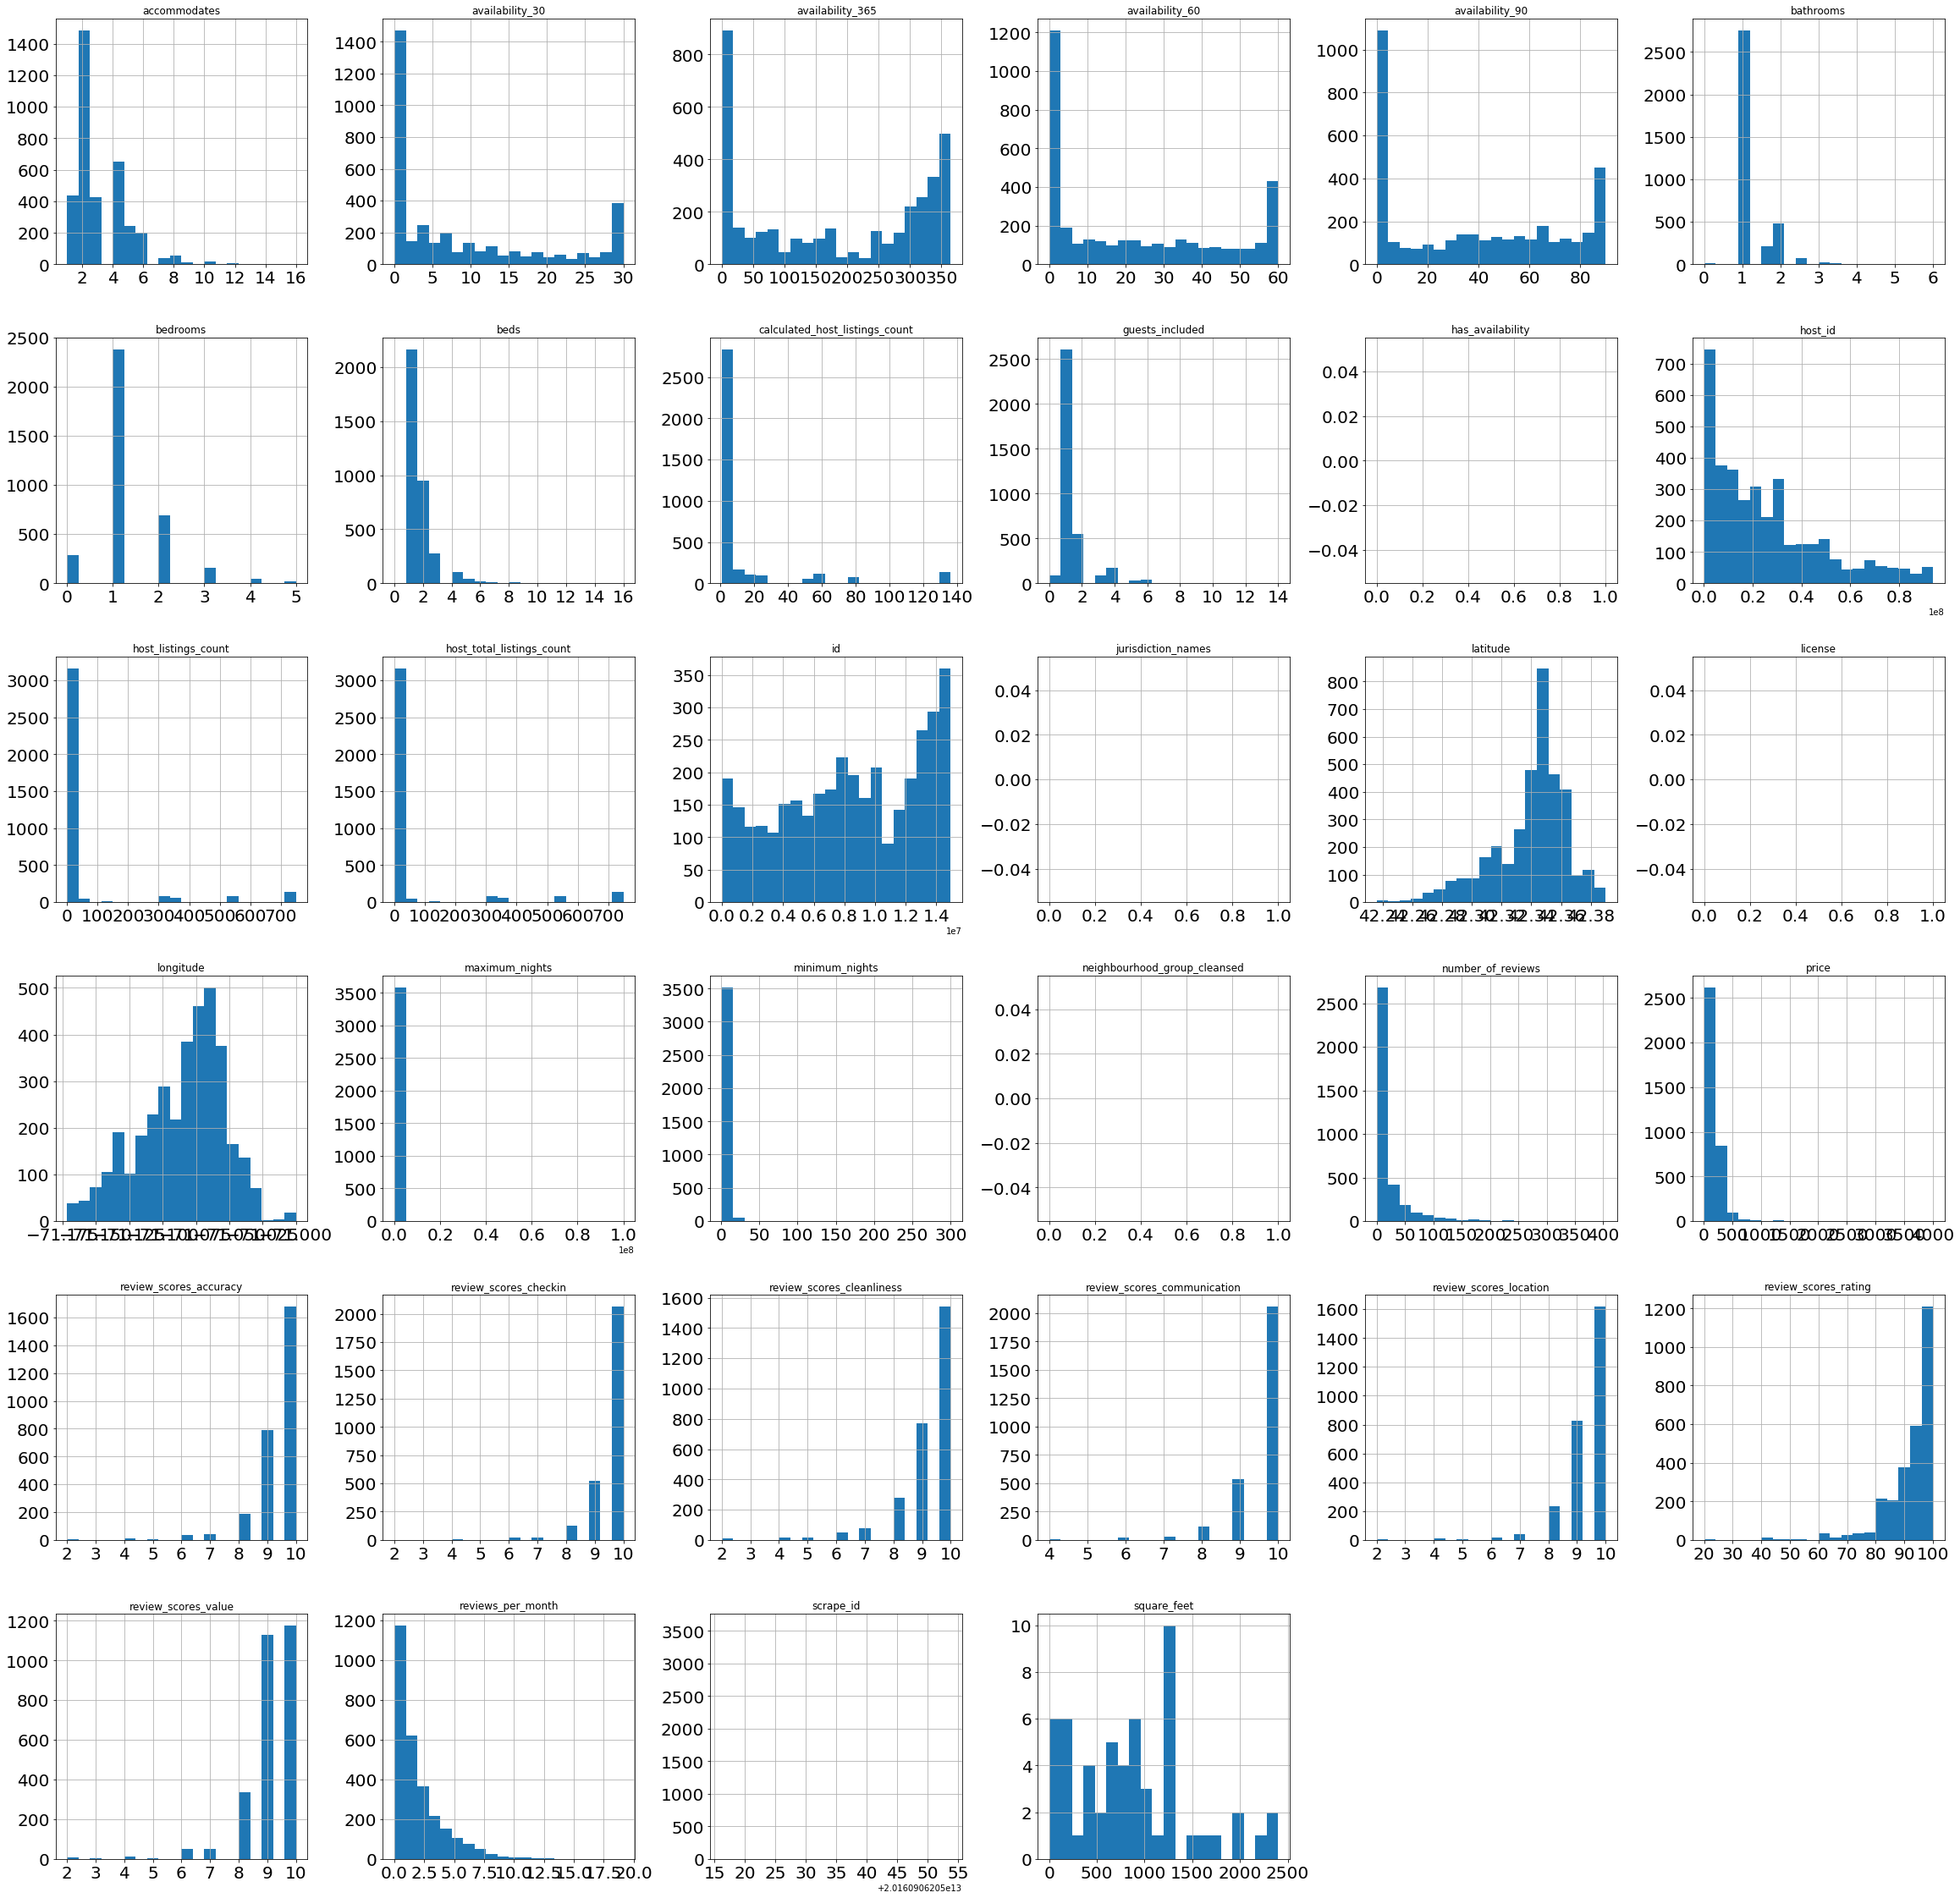

In [18]:
# check  the distribution for numerical variables
lis.hist(bins=20, xlabelsize=20, ylabelsize=20, figsize=(40,40));

In [19]:
# select columns for conditions of price
selected_lis = lis[['accommodates', 'host_listings_count', 'host_total_listings_count', 'bathrooms', 'bedrooms', 
                   'beds', 'number_of_reviews', 'review_scores_accuracy', 'price', 'square_feet']]

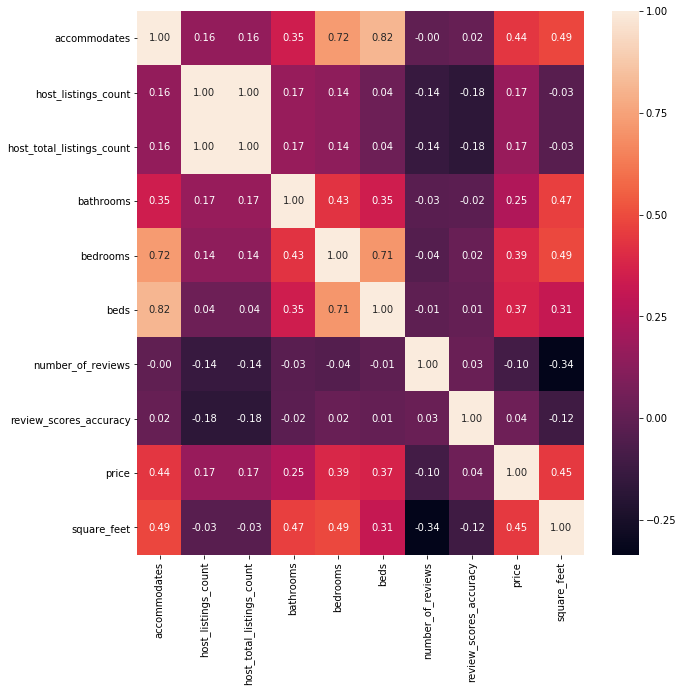

In [20]:
# check correlation between extracted variables
plt.figure(figsize=(10,10))
sns.heatmap(selected_lis.corr(), annot=True, fmt='.2f');

## About correlation between numerical variables
- `price` has higher coefficient of correlation with `accommodates`, `bedrooms` and `square_feet`.
- However, `square_feet` has higher coefficient of correlation with `bedrooms`, and `accommodates`. `square_feet` has more `Nan` than `bedrooms` and `accommodates`.
- `accommodates` and `bedrooms` are highly related so we need to choose one of them. `accommodates` doesn't have `Nan` so we will chose `accommodates`.

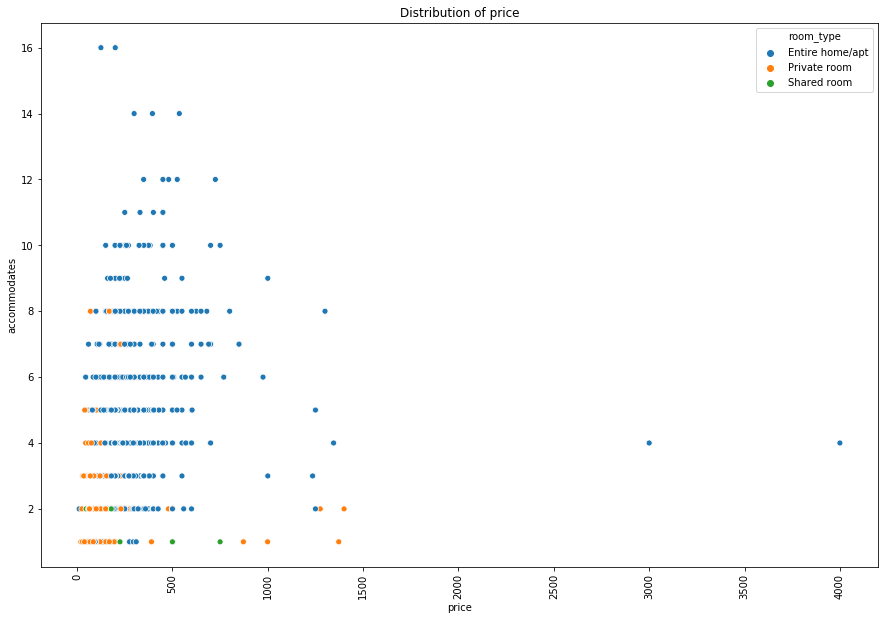

In [21]:
# plot the price with scatter
# all properties
plt.figure(figsize=(15, 10));
sns.scatterplot(x='price', y='accommodates', hue='room_type', data=lis);
plt.xticks(rotation='vertical');
plt.title('Distribution of price')
plt.savefig('dist_price.jpg')

## About the distribution of price for each accomodates and room type
- `price` varies even if conditions about the room type and accommodates are the same.

- Therefore, **`accommodates` and `room_type` are not enough to decide the price.**

# What is the difference instead of `accommodates` and `room_type` ? 
- how about location of the property?

In [22]:
# take a look at when accommodates == 2 and room_type == 'Entire home/apt'
tmp_df = lis[(lis.accommodates == 2) & (lis.room_type == 'Entire home/apt')]

In [23]:
# descriptive statistics for price
tmp_df.price.describe()

count     597.000000
mean      178.324958
std        81.645770
min        11.000000
25%       135.000000
50%       165.000000
75%       209.000000
max      1250.000000
Name: price, dtype: float64

In [24]:
# check the counts for each city
tmp_df.city.value_counts()

Boston              591
Brighton              2
Jamaica Plain         2
Cambridge             1
Roxbury Crossing      1
Name: city, dtype: int64

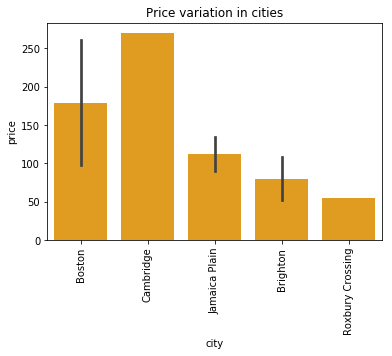

In [25]:
# show average and sd as bar
plt.figure(figsize=(6,4));
sns.barplot(x='city', y='price', data=tmp_df[['city', 'price']].sort_values(by='price', ascending=False), 
            ci="sd", color='orange');
plt.xticks(rotation='vertical');
plt.title('Price variation in cities');
plt.savefig('price_var_cities.jpg')

## About city and price relationships
- standard deviation is different in each city and `Boston` has big standard deviation which means its price varies in wide range.
- `Cambridge` has the highest average price.

## So city can differ price! Check the effect by difference of city for price

accommodates = 4 



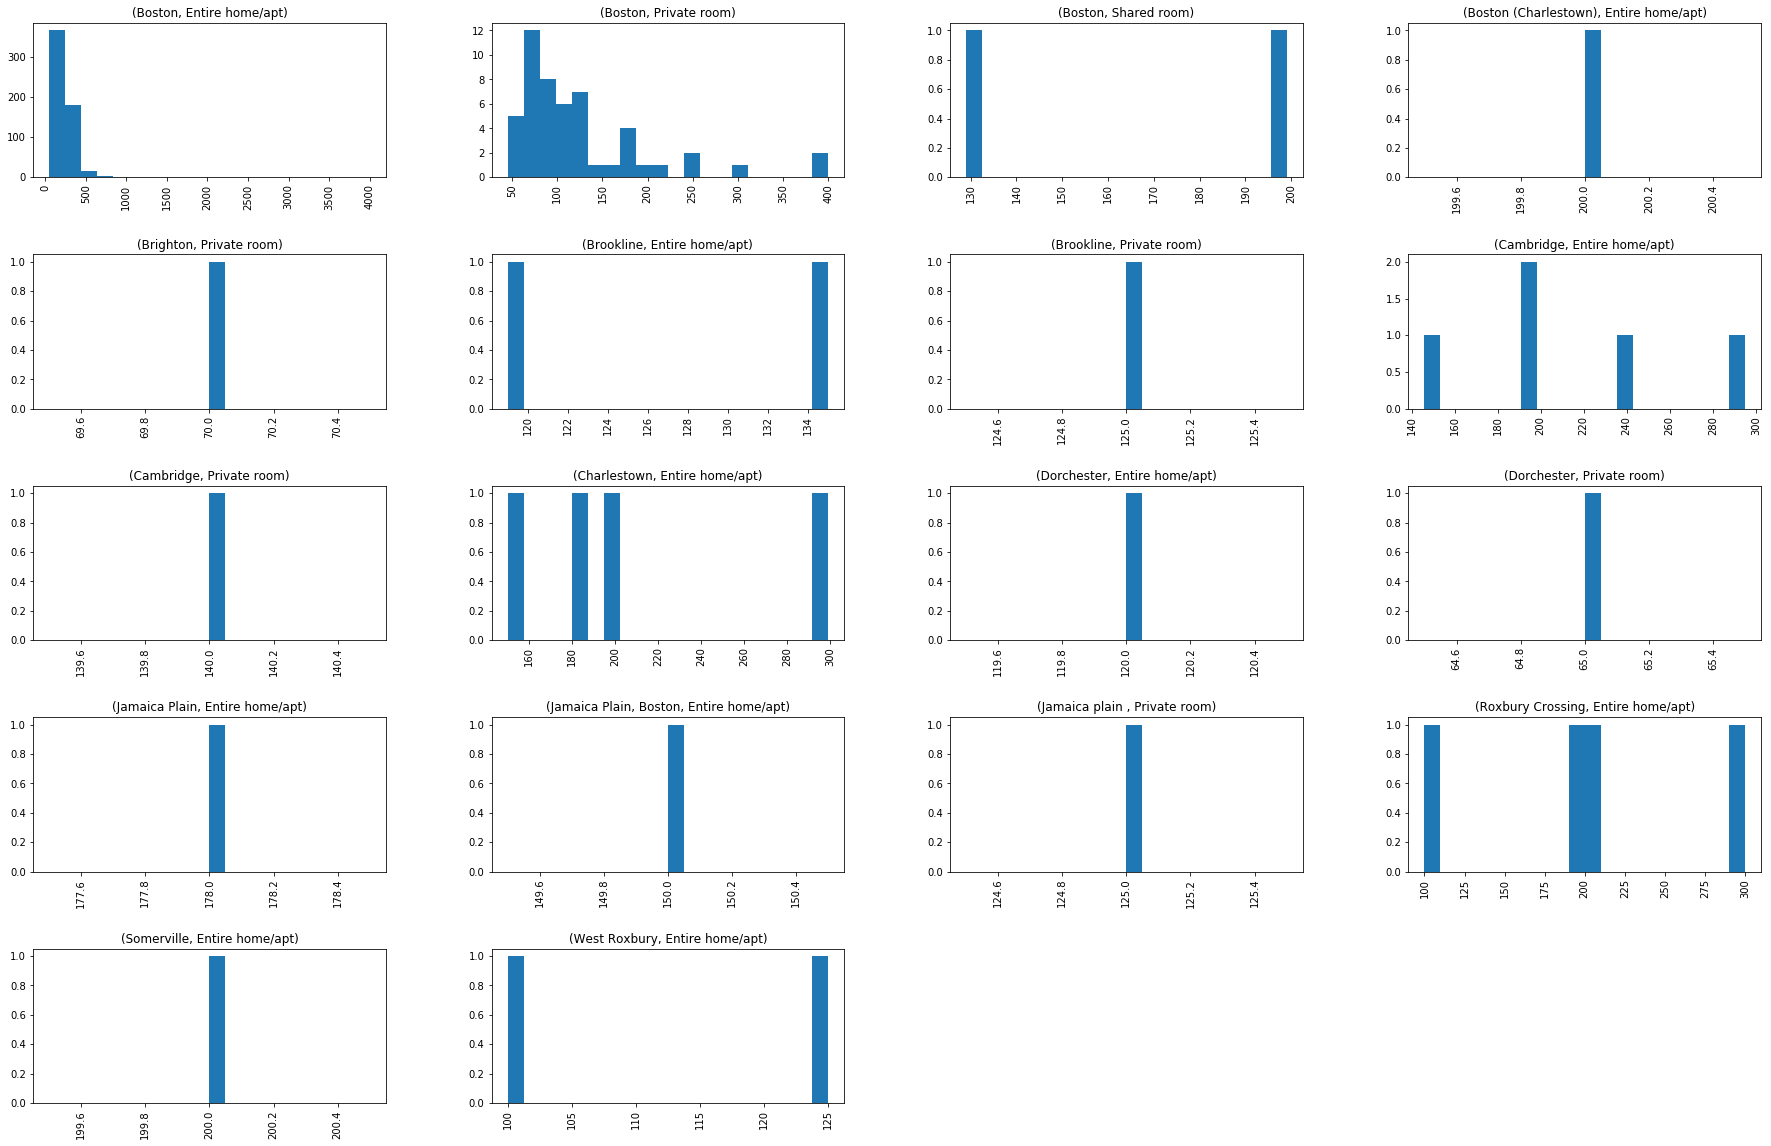

accommodates = 2 



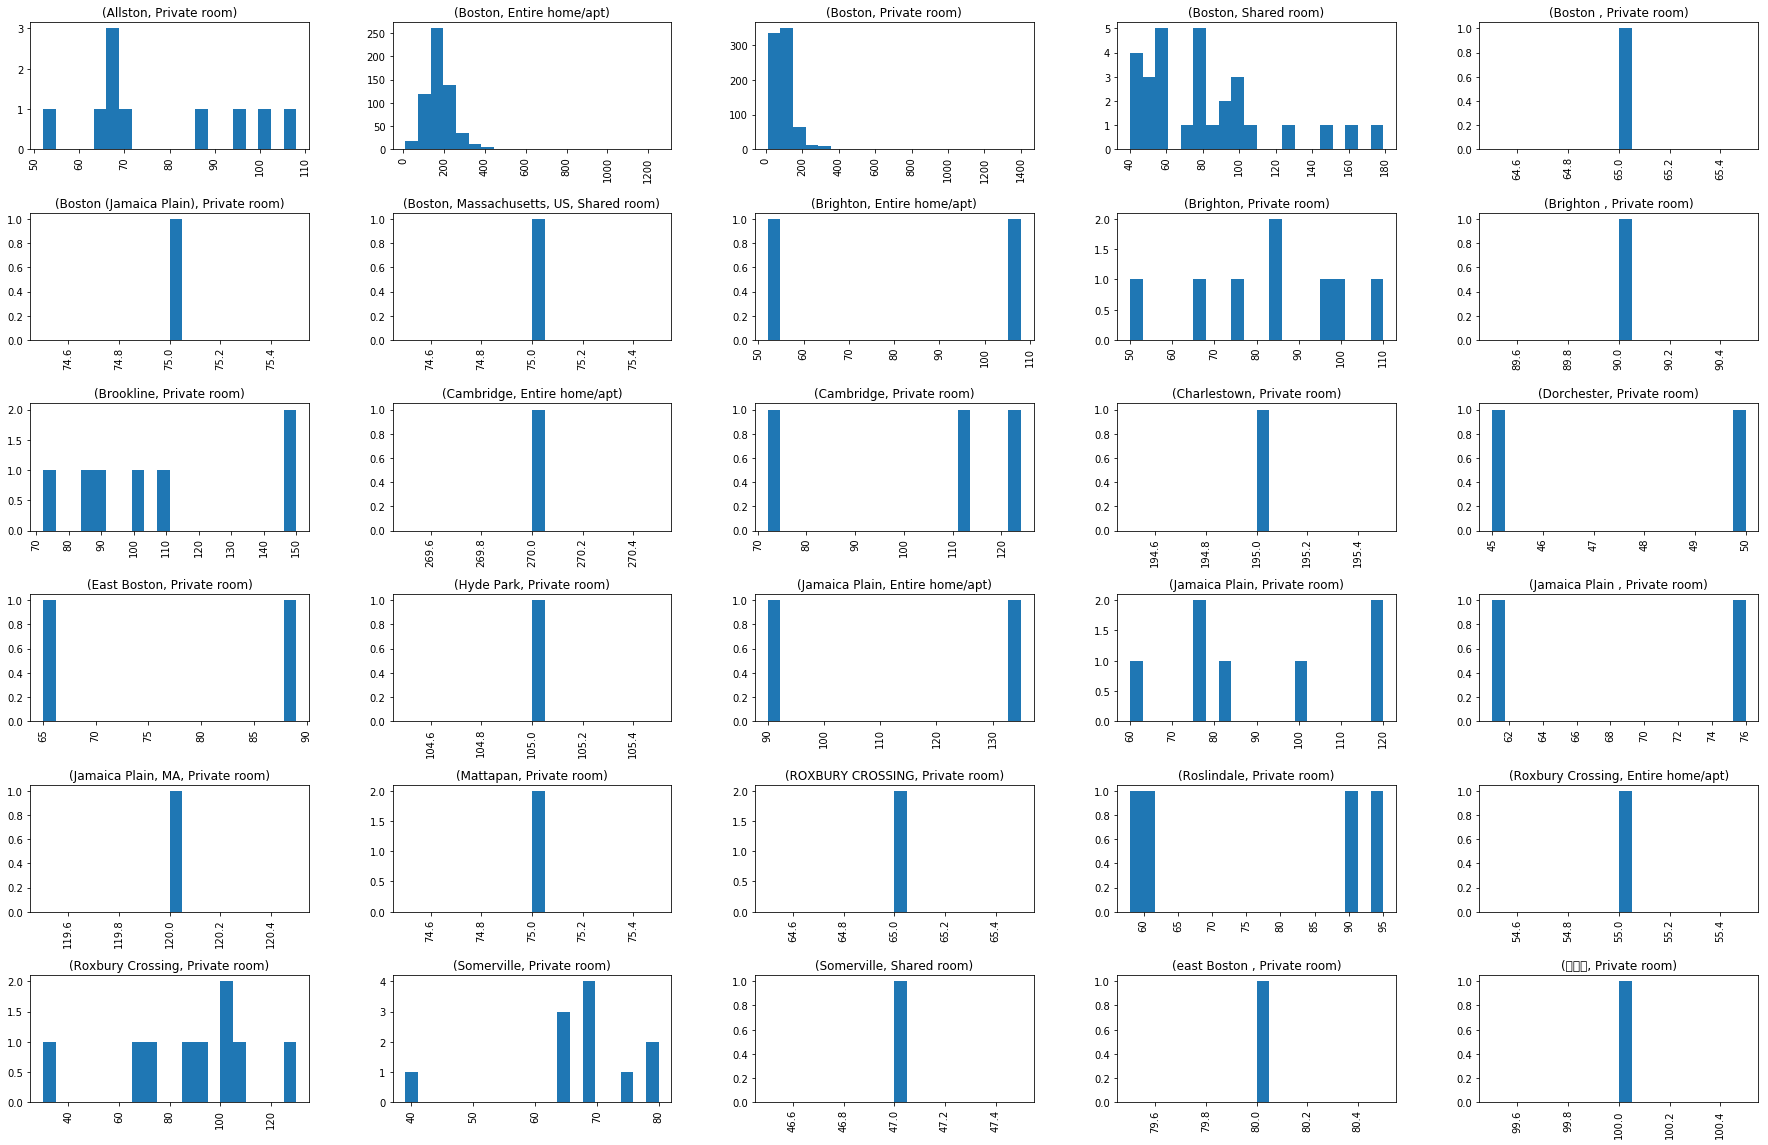

accommodates = 3 



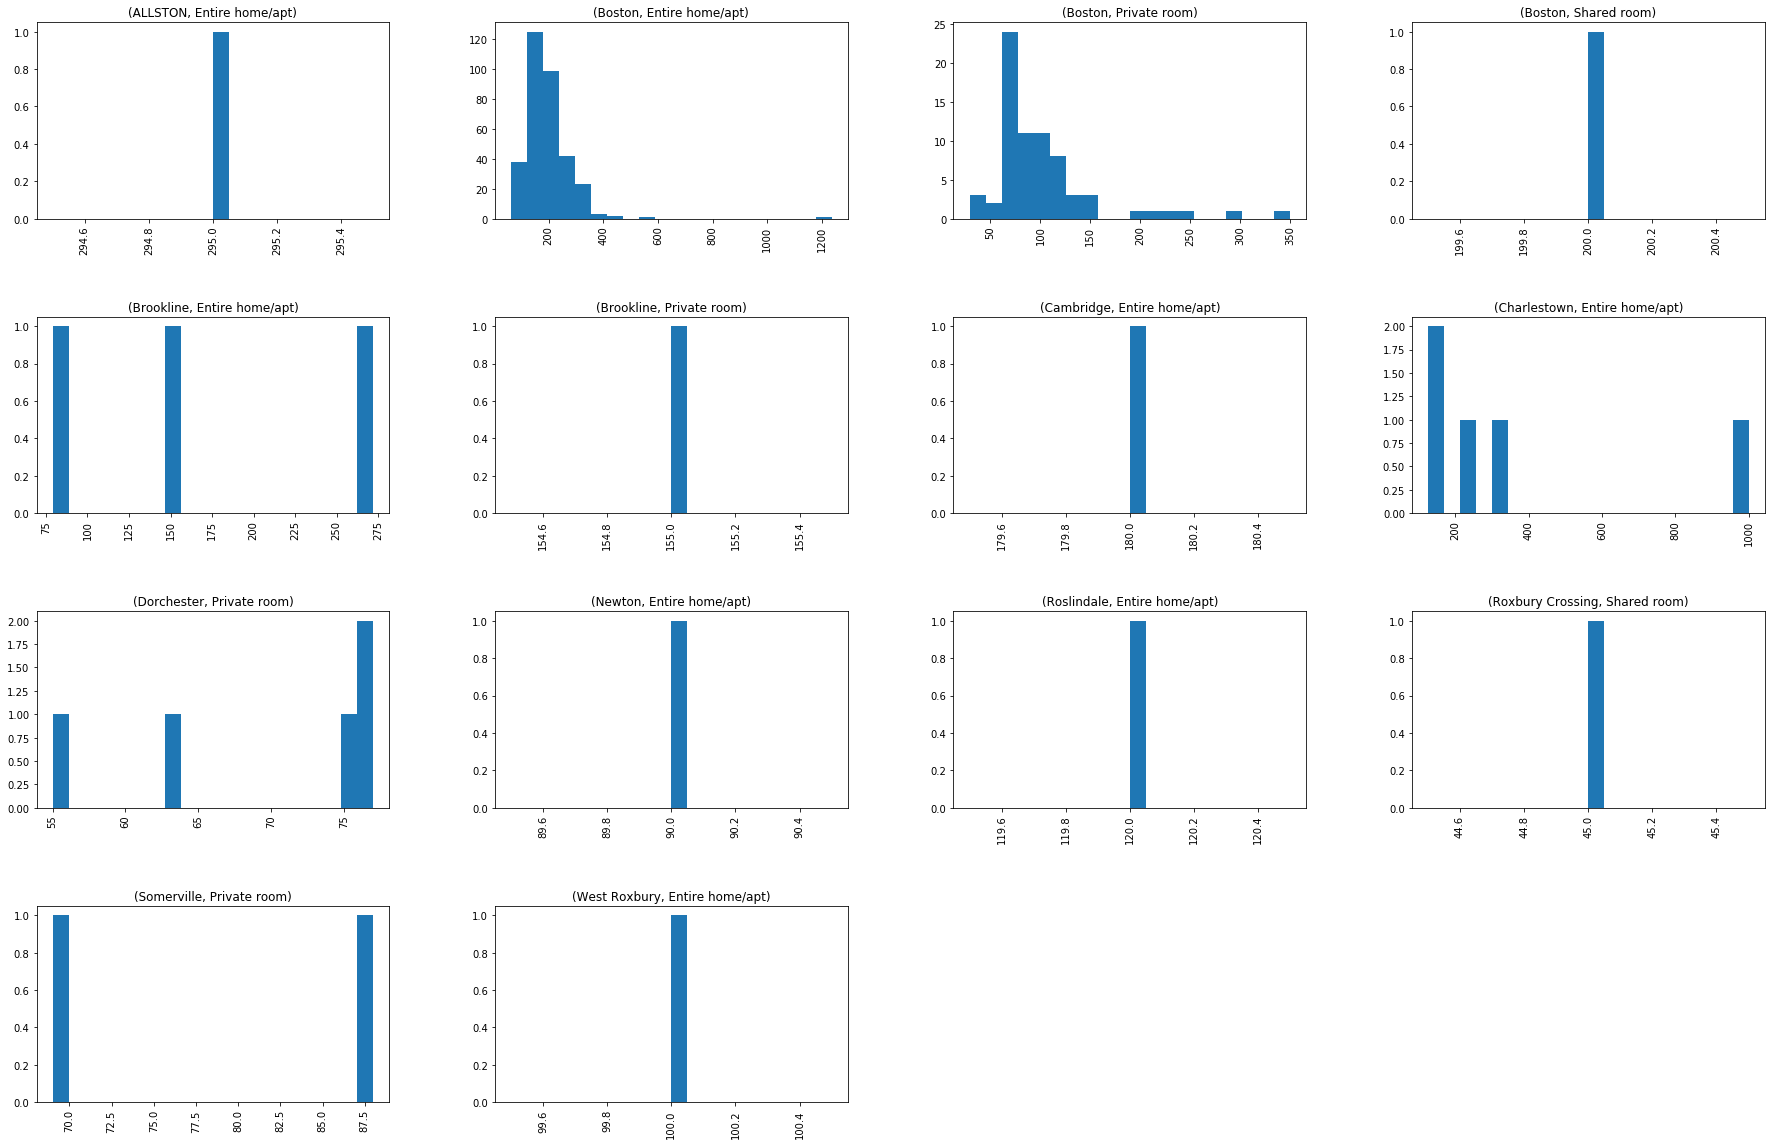

accommodates = 5 



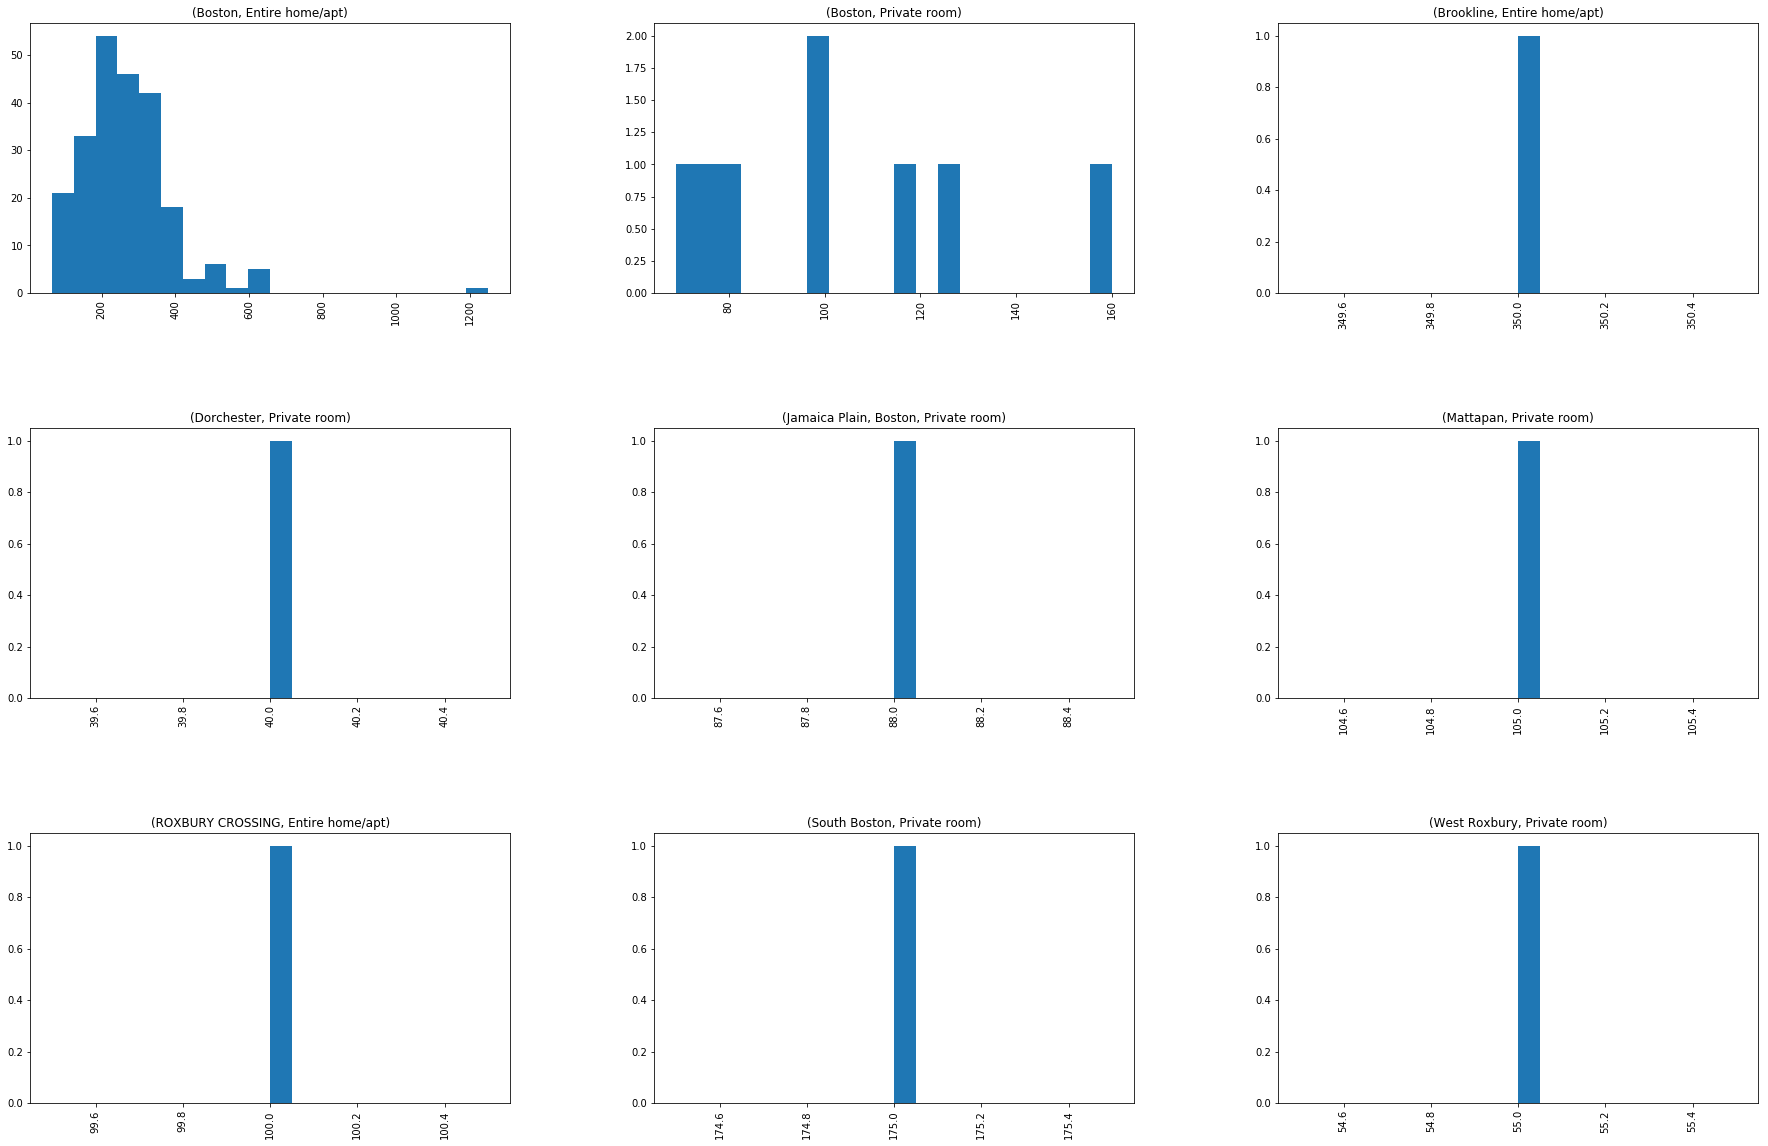

accommodates = 1 



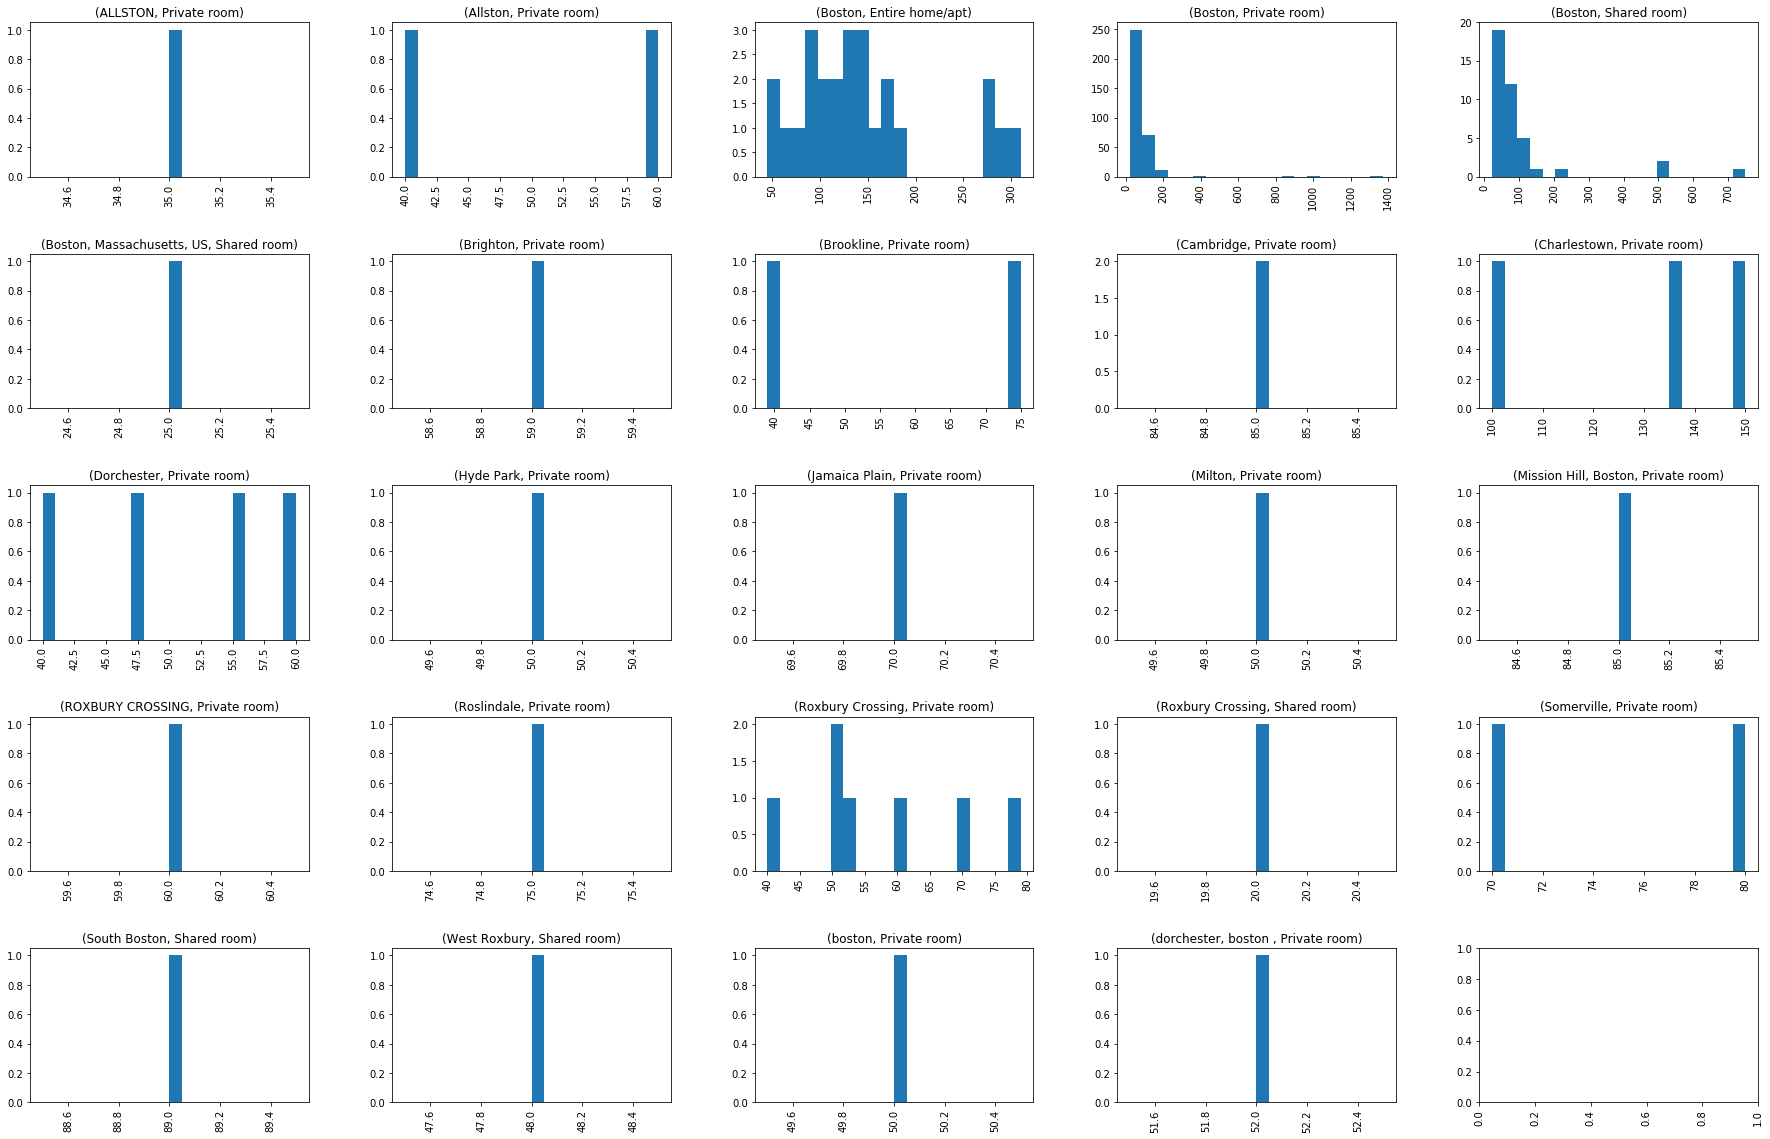

accommodates = 8 



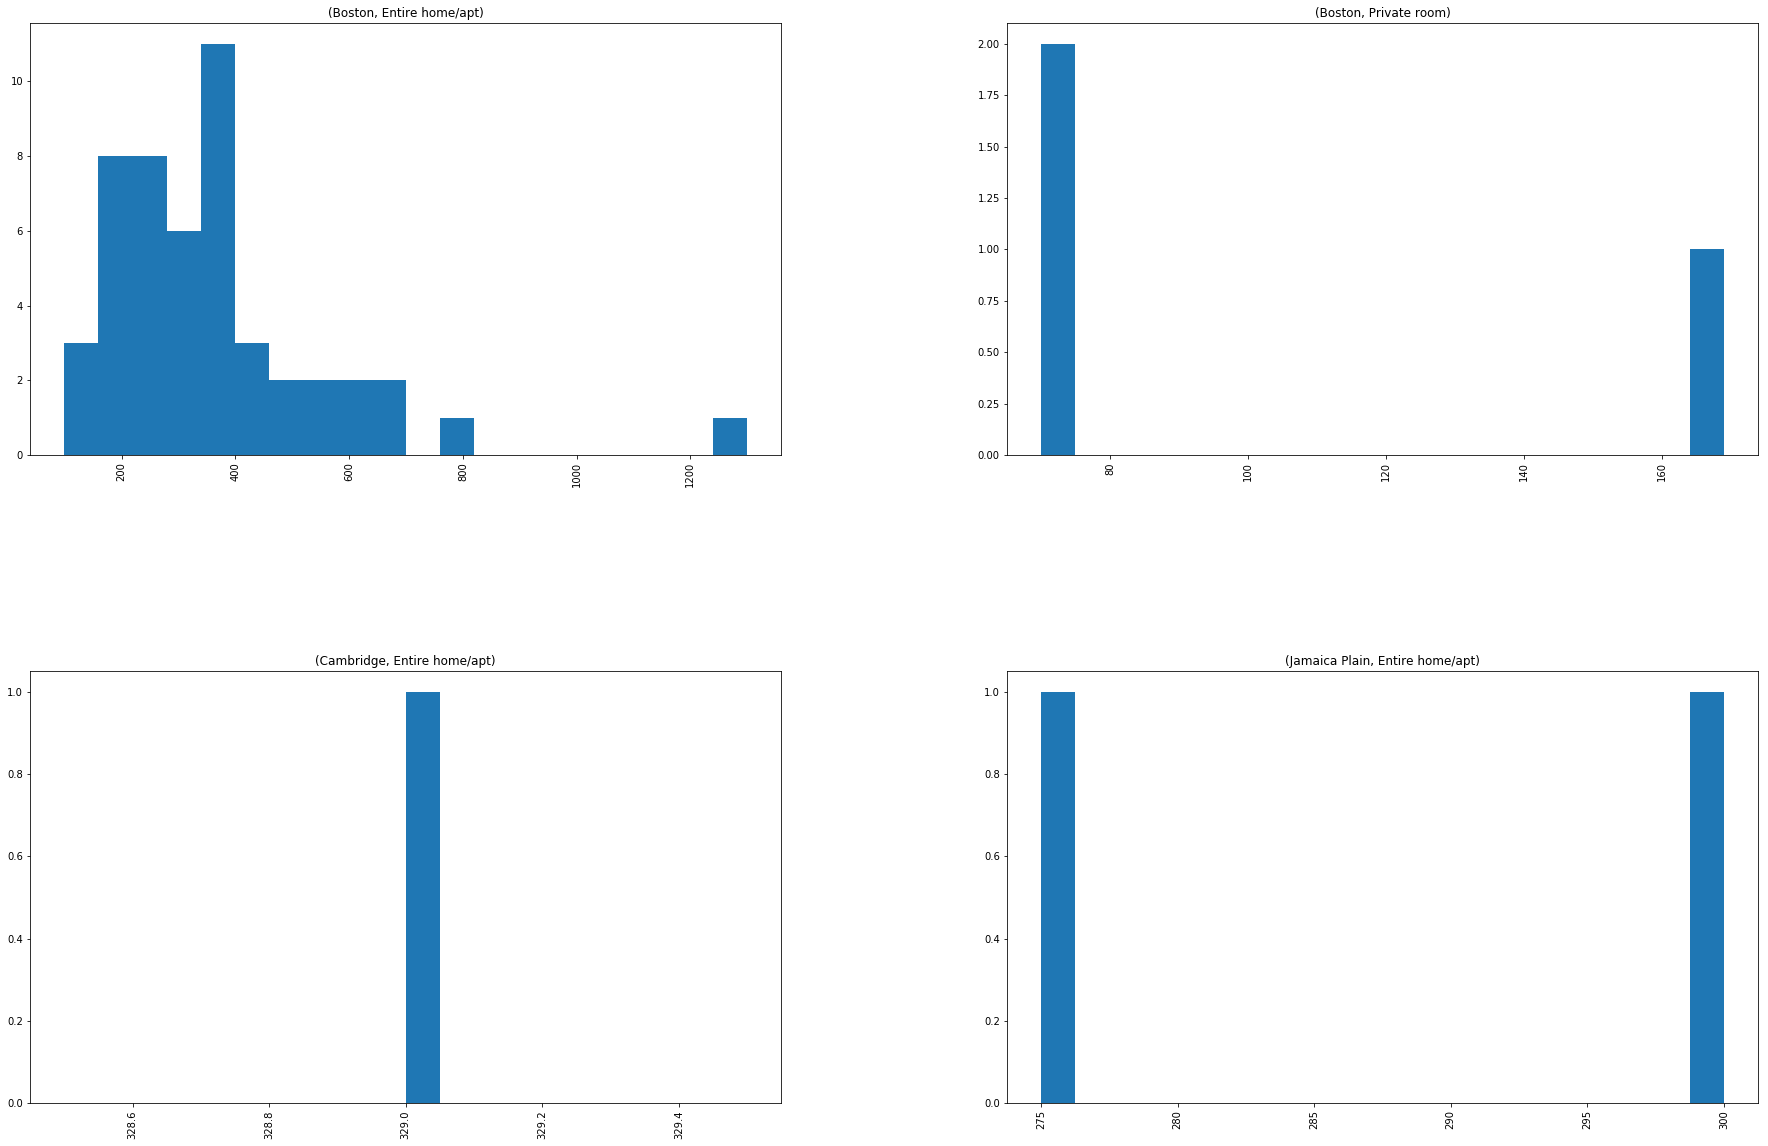

accommodates = 6 



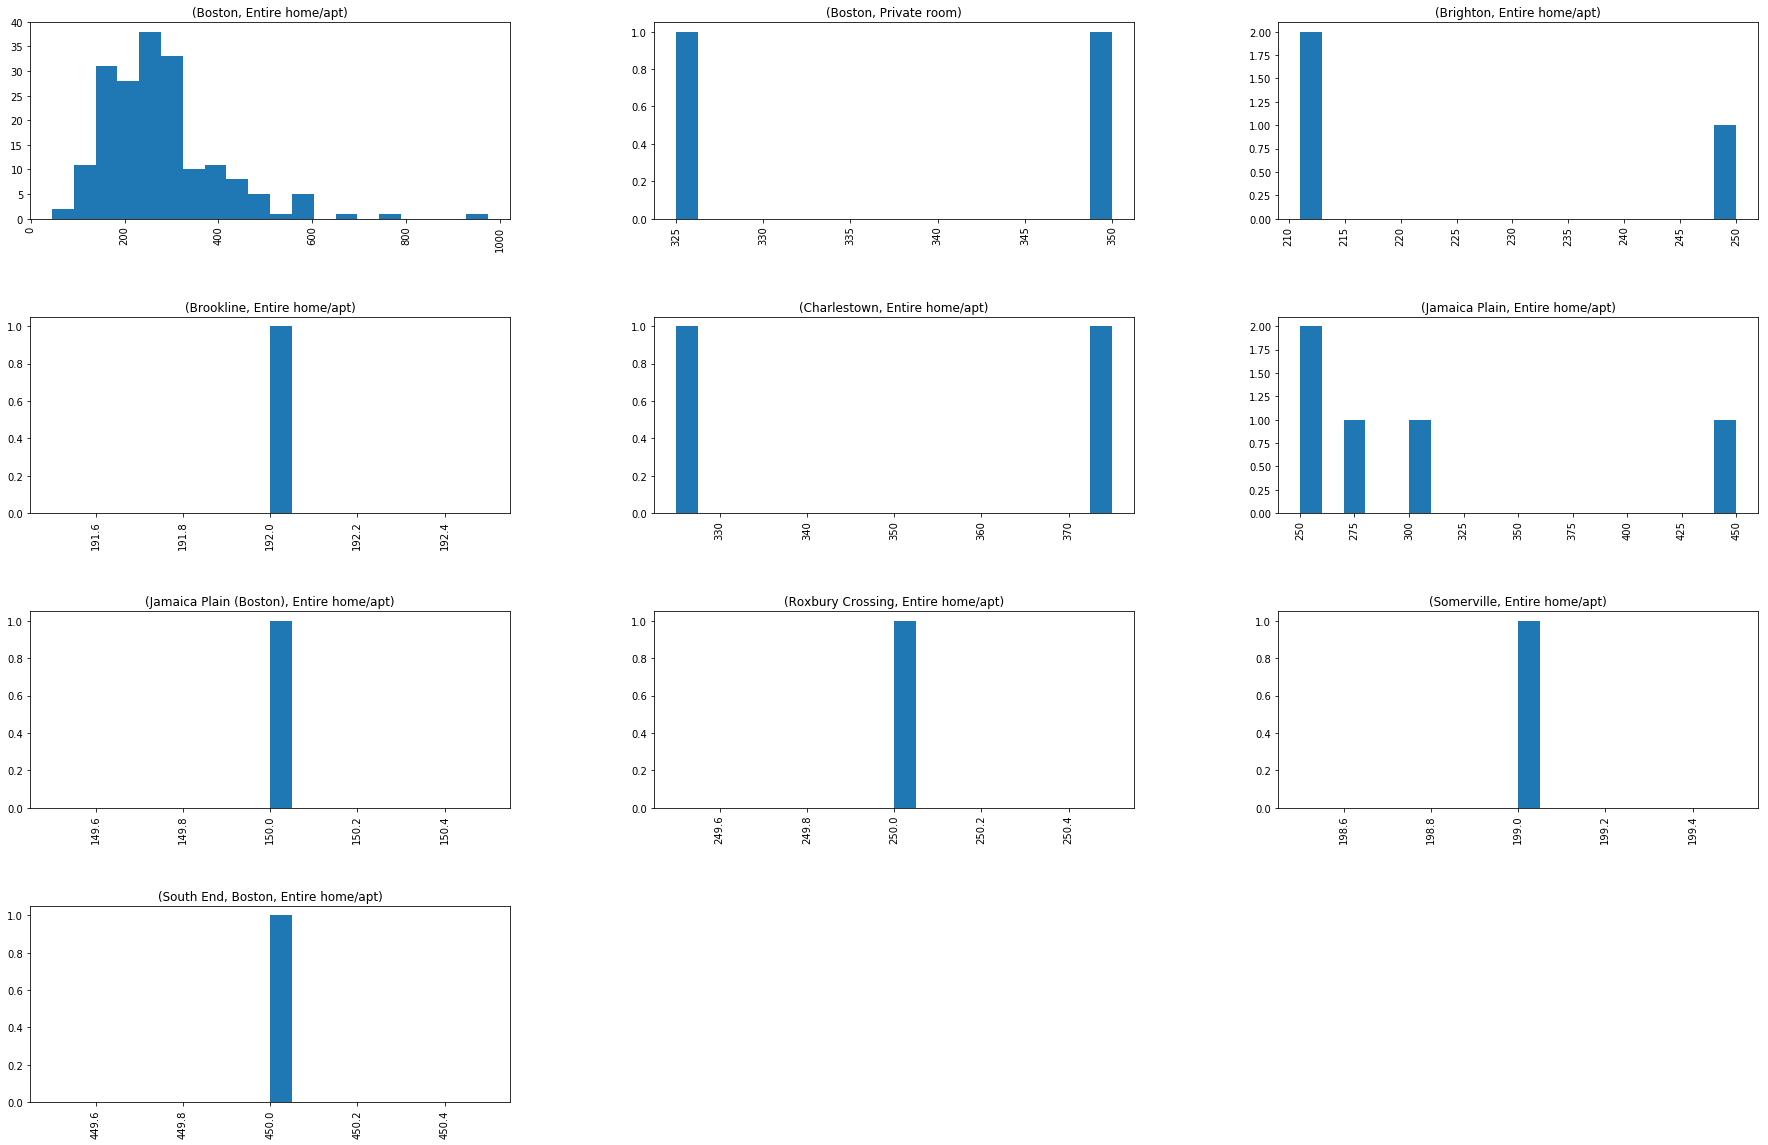

accommodates = 16 



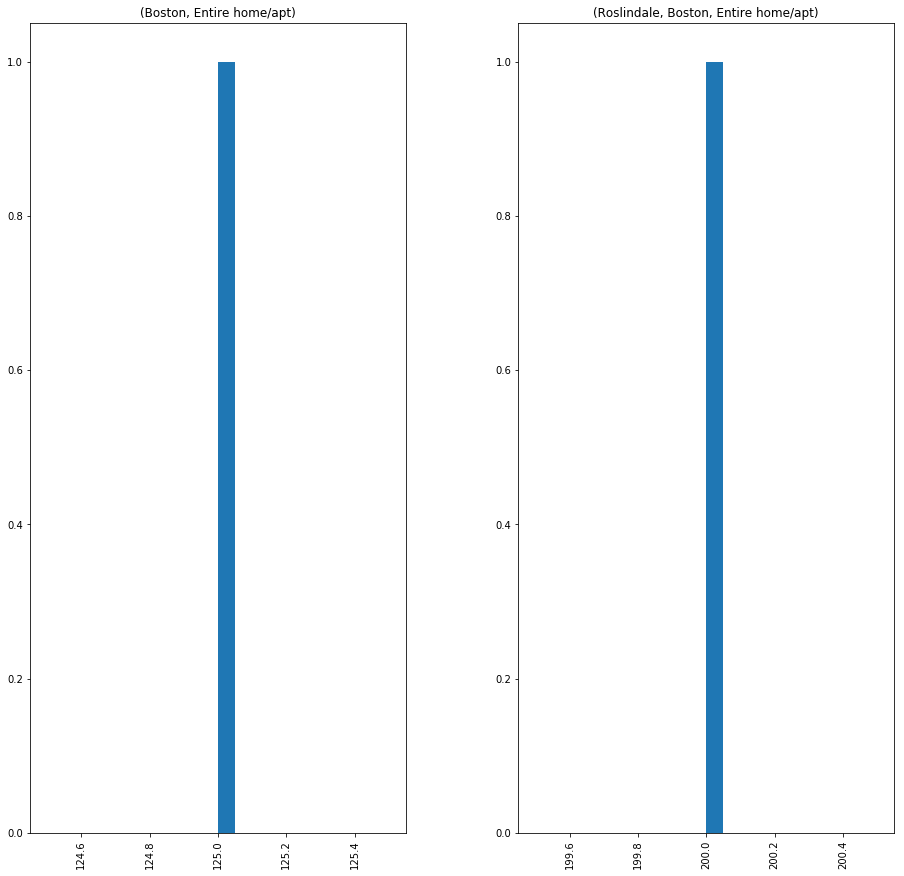

accommodates = 7 



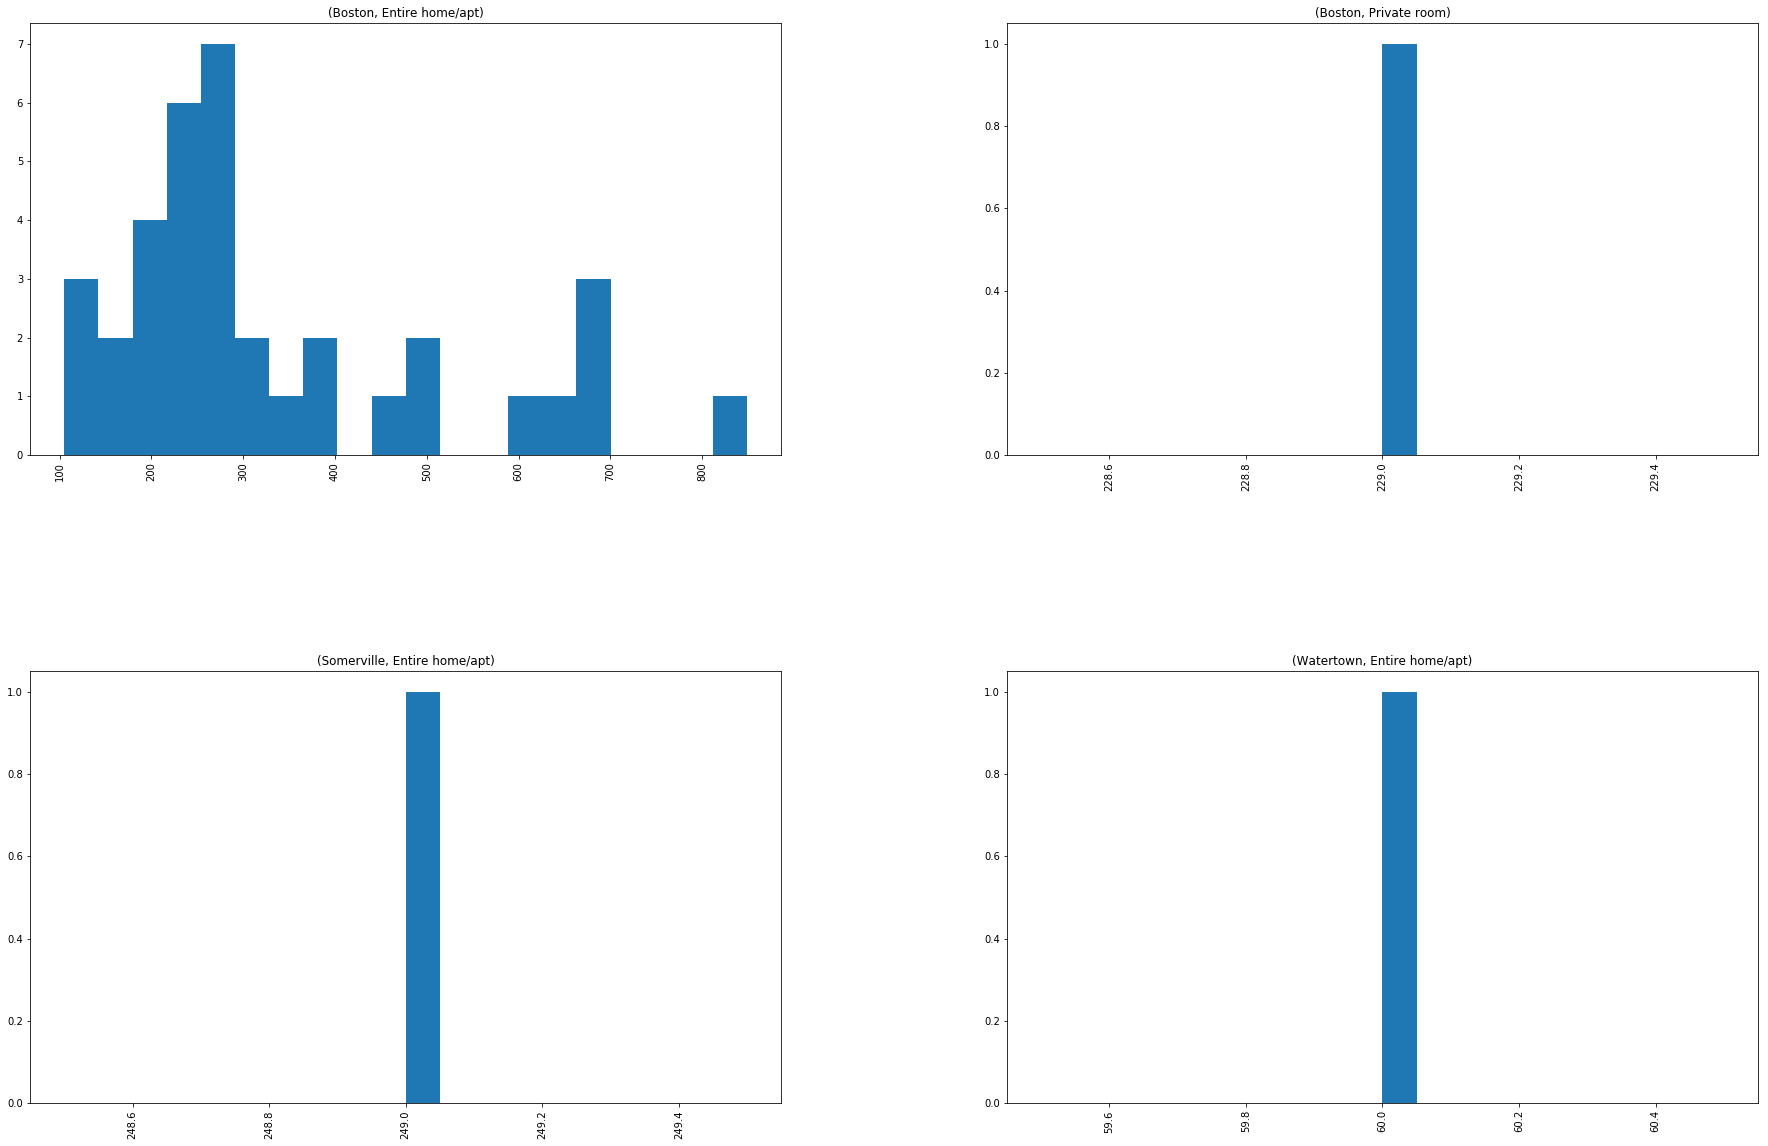

accommodates = 9 



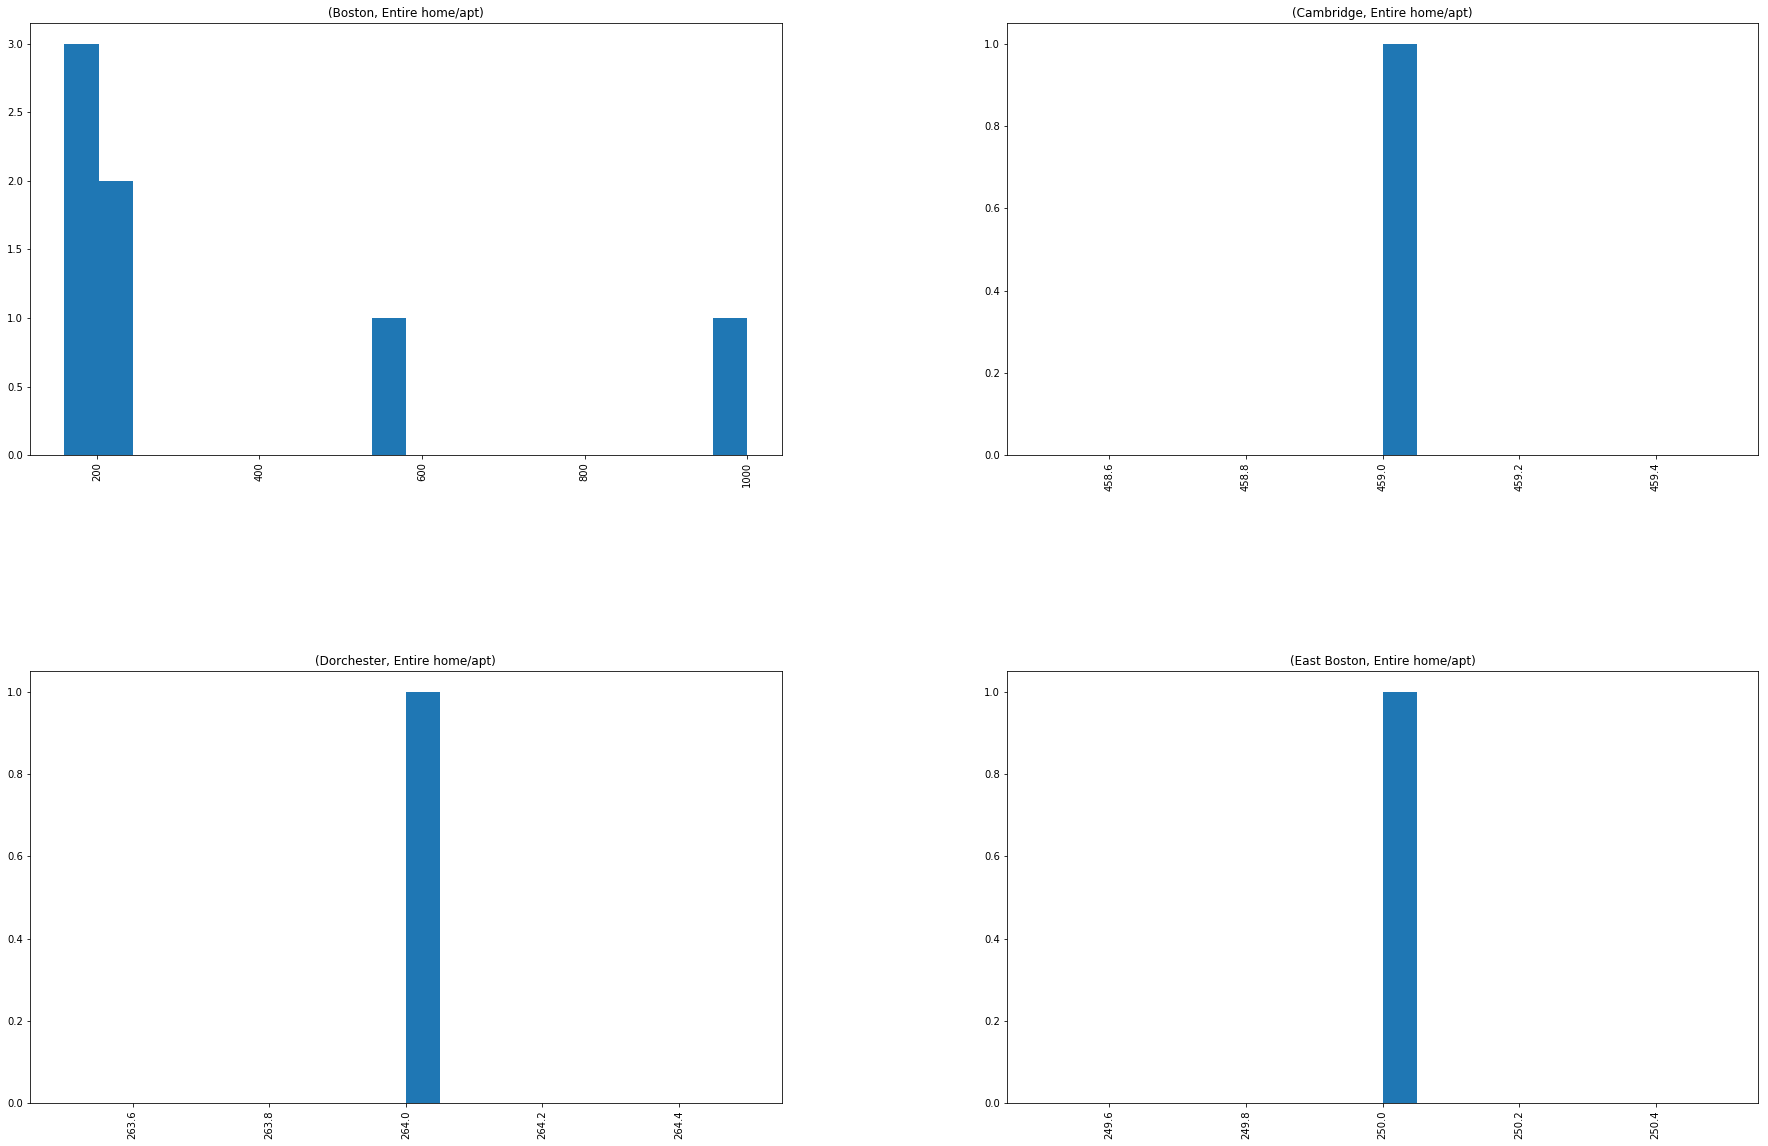

accommodates = 10 



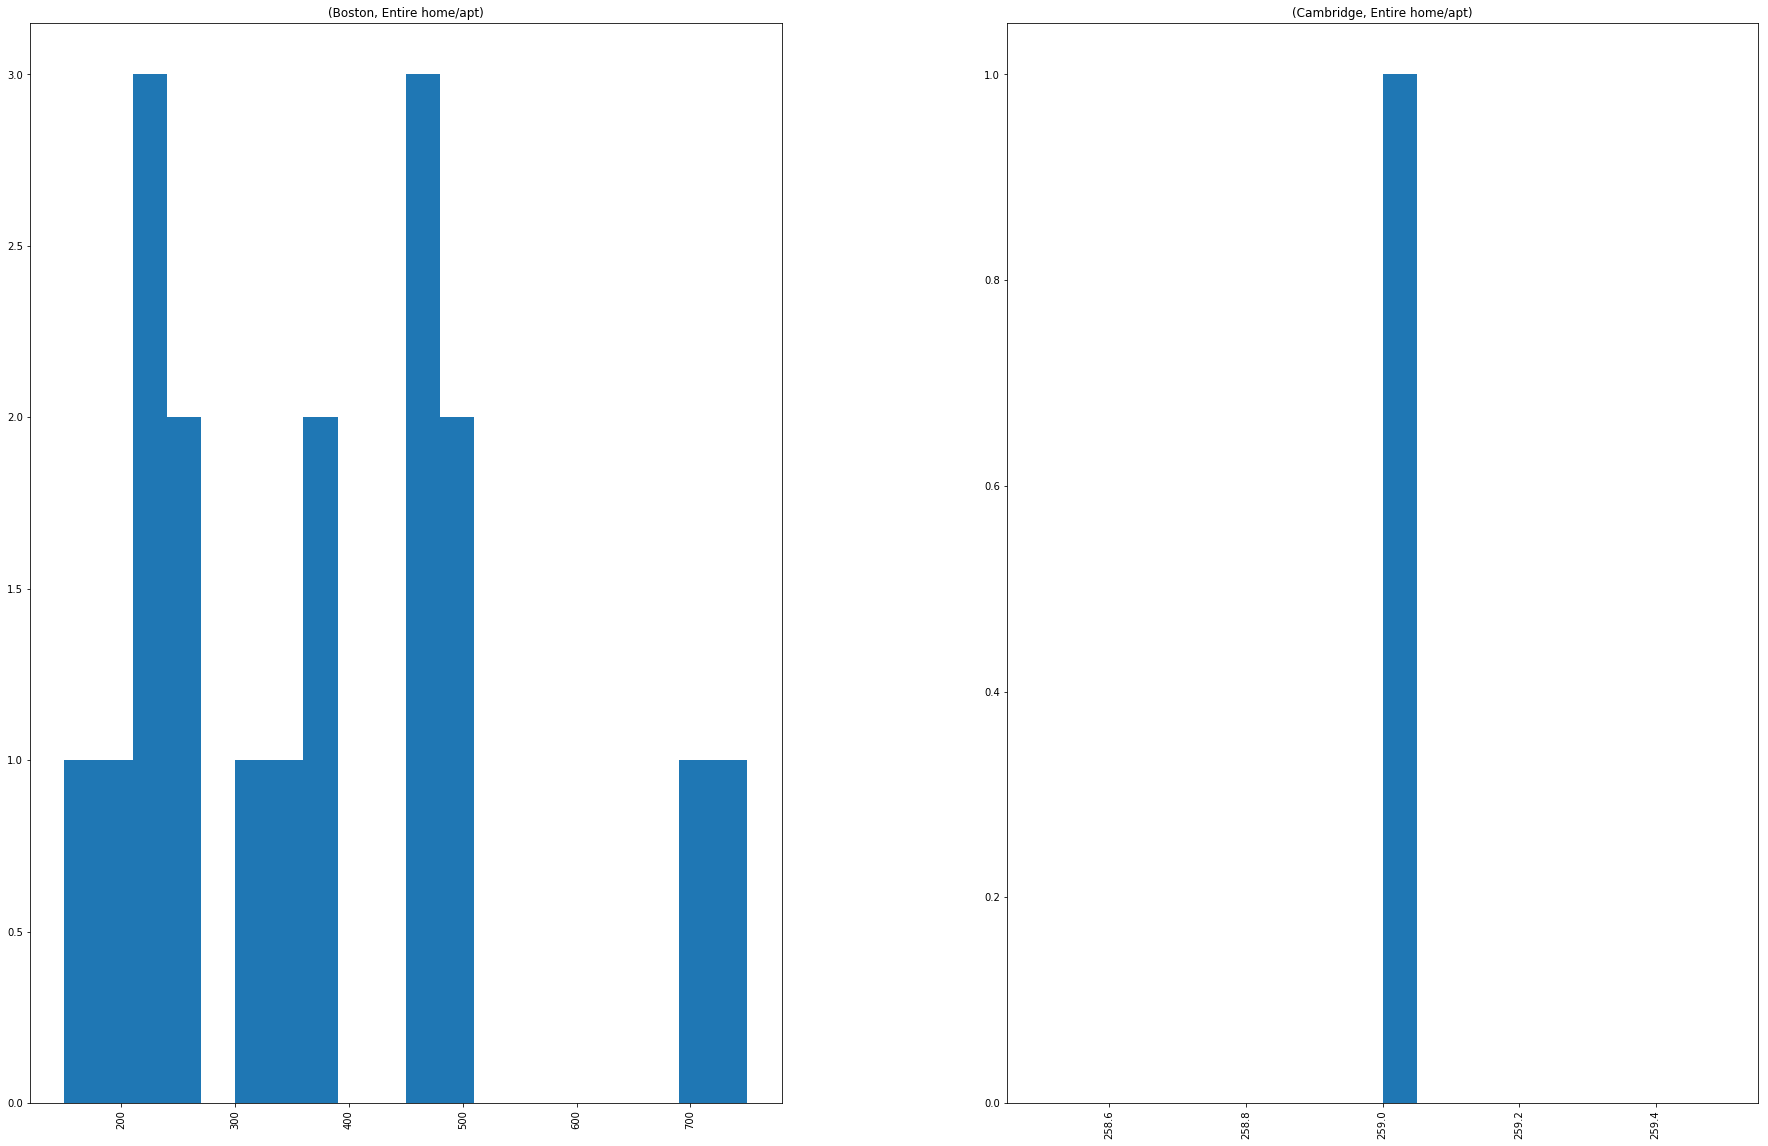

accommodates = 12 



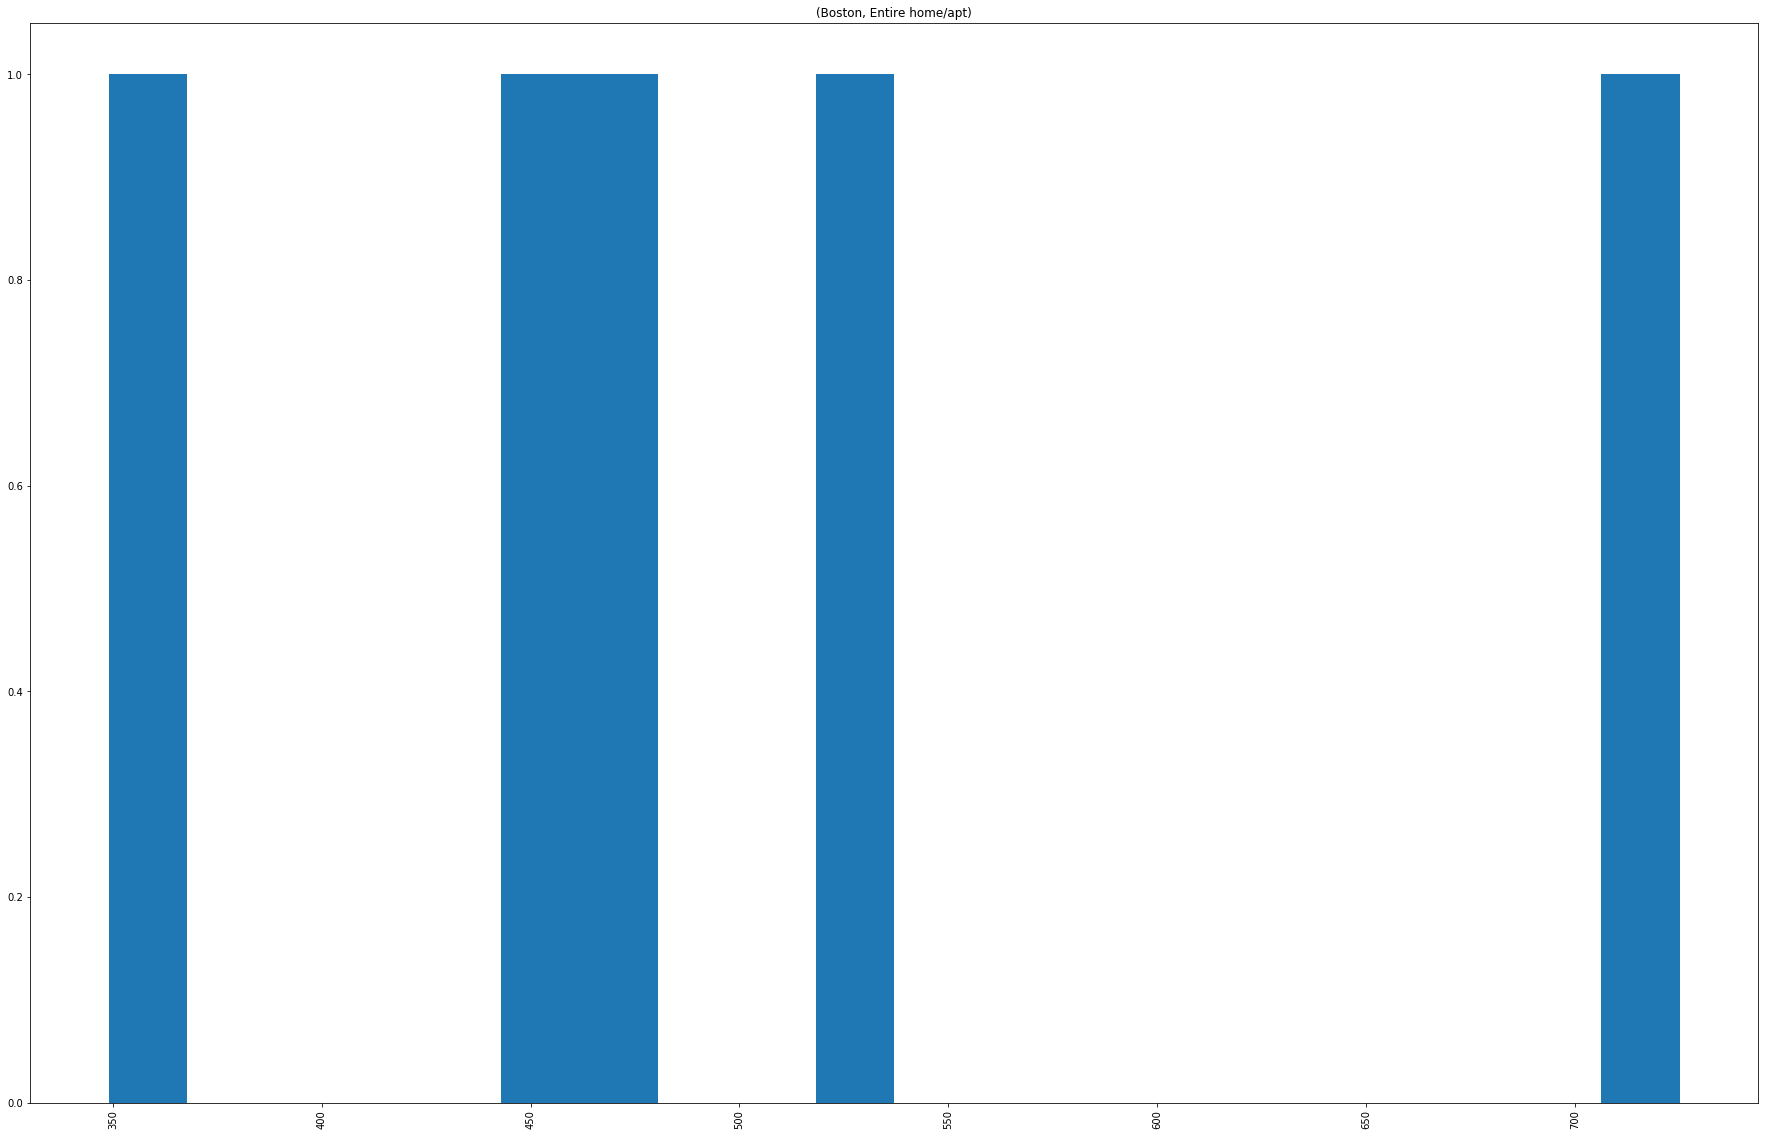

accommodates = 11 



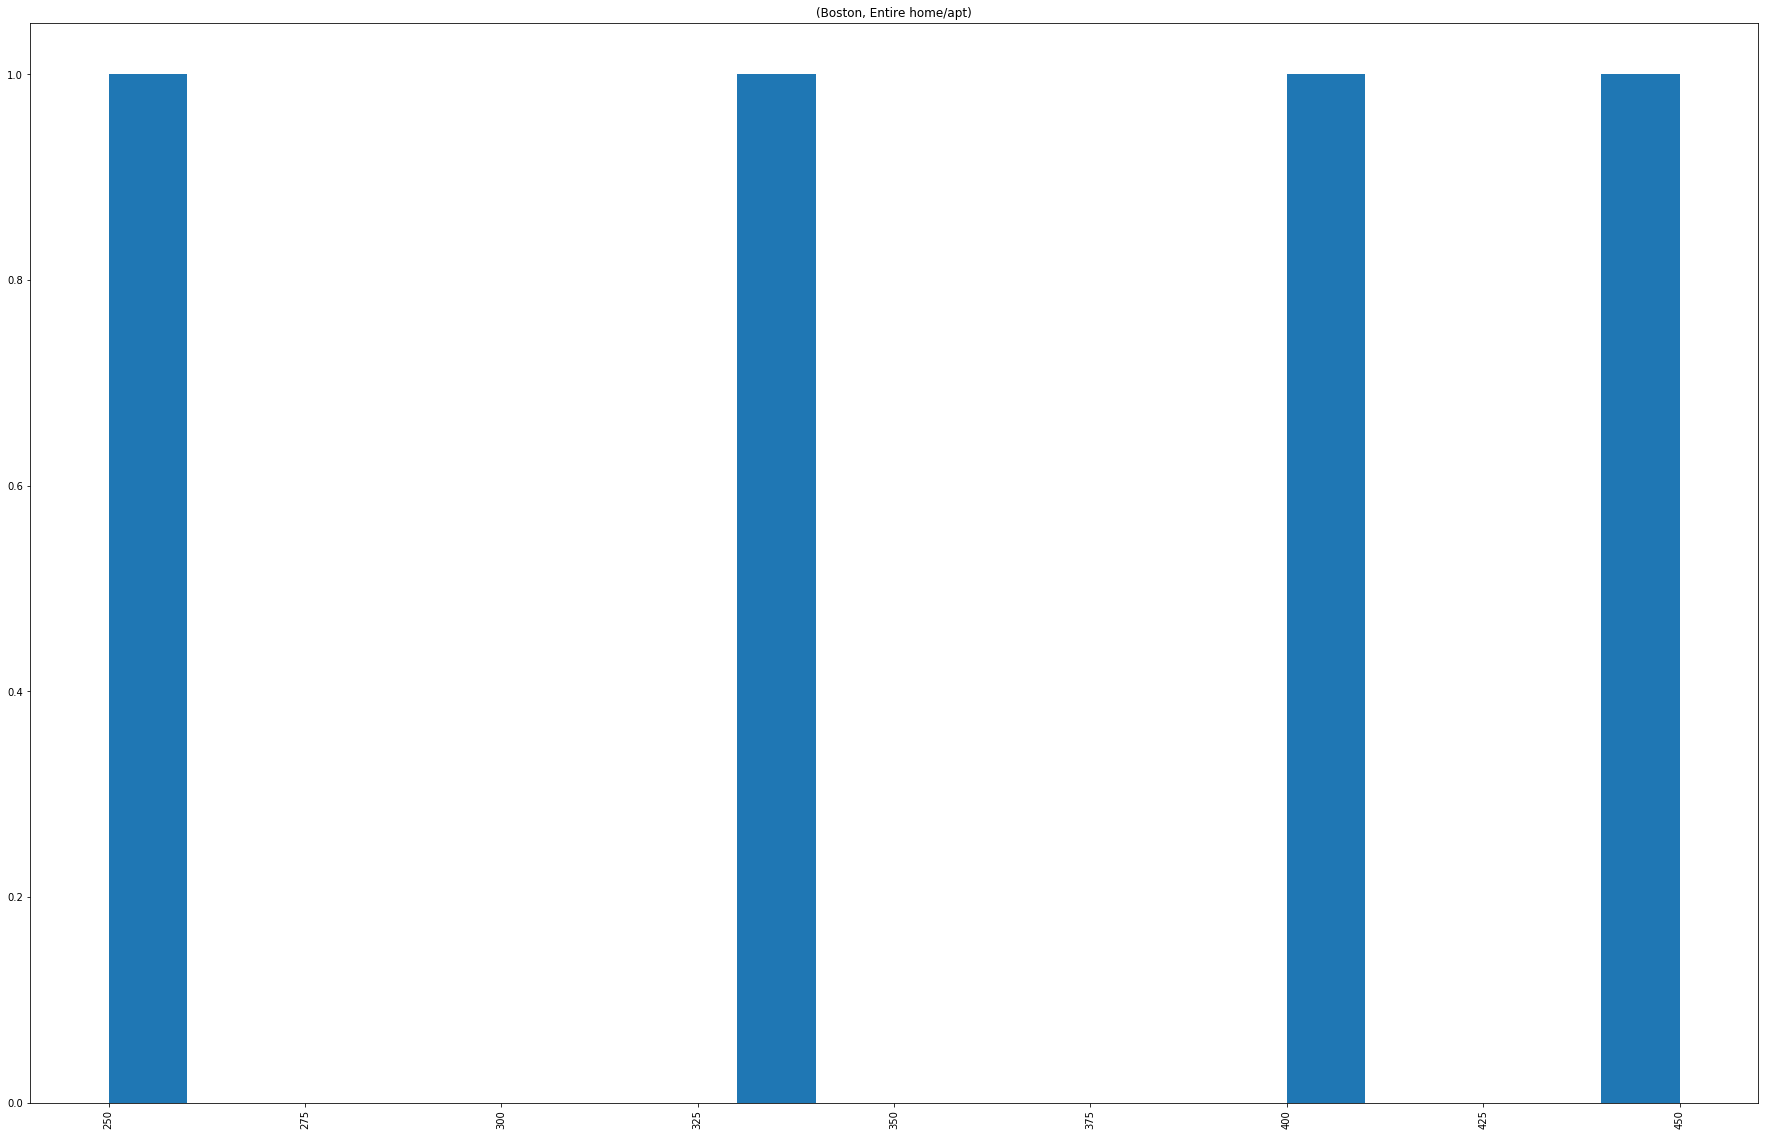

accommodates = 14 



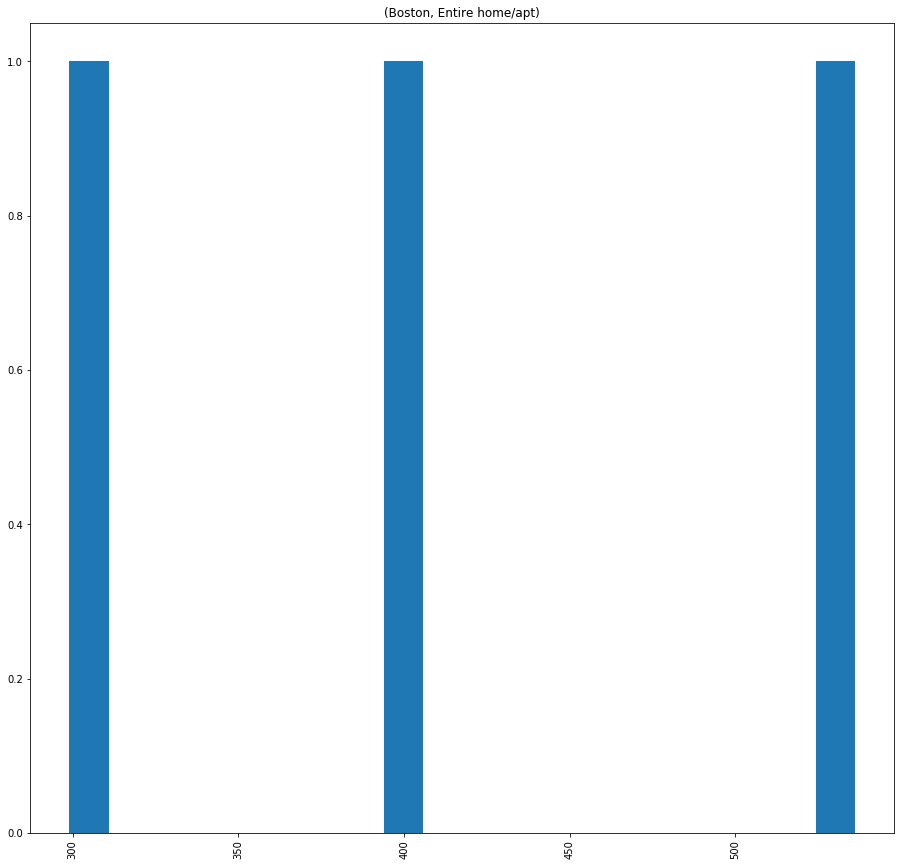

In [26]:
for i in lis.accommodates.unique():
    print('accommodates = ' + str(i), '\n')
    if len(lis[lis.accommodates == i]) >= 4:
        figsize = (30, 20)
    else:
        figsize = (15, 15)
    lis[lis.accommodates == i].hist(column='price', by=['city', 'room_type'], grid=True, figsize=figsize, bins=20,
                                   xlabelsize=10, ylabelsize=10);
    plt.show();
    plt.close();

## Price varies in cities under the condition that accommodates are the same!
- **The combination of cities and room type changes the price.**

# Summary
- Question 1 ) `city`, `room_type` and `accommodates` effect the change of prices.

## * cal.price is the price when the properties are not booked.

# Question 2. How can we get more money from AirBnB business?
## distributions of properties price
 - 2-1) What makes more booked listings? or less booked listings?
     - cheap?  good reviews?
 - 2-2) What makes good review scores by customers?
 - 2-3) Owner's attributes
     - 1, Do owners who have more propaties earn more money than owners who have less propaties? or Do owners with experiences for longer time earn more money than 
      - (This is based on the idea that more experiences of sharing rooms/houses increases profits.)
     - 2, Owner's reliability/hospitality

In [27]:
# check the number of `available` for each listing
booked = cal[cal.available == 'f'].groupby('listing_id').available.count()
non_booked = cal[cal.available == 't'].groupby('listing_id').available.count()
booking_ratio = booked / (booked + non_booked)

In [28]:
more_booked = booking_ratio[booking_ratio >= 0.7].sort_values(ascending=False)
more_booked.head()

listing_id
2660908     0.99726
894539      0.99726
7553969     0.99726
5532549     0.99726
13004551    0.99726
Name: available, dtype: float64

In [29]:
more_booked.describe()

count    757.000000
mean       0.878073
std        0.085085
min        0.701370
25%        0.805479
50%        0.887671
75%        0.956164
max        0.997260
Name: available, dtype: float64

In [30]:
less_booked = booking_ratio[booking_ratio <= 0.3].sort_values(ascending=False)
less_booked.head()

listing_id
13564762    0.29863
1529321     0.29863
10381729    0.29863
13374617    0.29863
826706      0.29863
Name: available, dtype: float64

In [31]:
less_booked.describe()

count    1405.000000
mean        0.107725
std         0.077874
min         0.002740
25%         0.043836
50%         0.095890
75%         0.158904
max         0.298630
Name: available, dtype: float64

In [32]:
more_booked_id = more_booked.index.to_list()

In [33]:
less_booked_id = less_booked.index.to_list()

##  2-1) What makes more booked listings? or less booked listings? 
- check the price for each
- check how positive/negative in reviews

In [34]:
def make_series_df(ids_list, target_column, df_return=True):
    '''
    by listing data, make dataframe for price with selected ids
    
    ids_list : list :  list for ids
    target_column : strings : the name of column
    df : bool : True->make and return a dataframe
                False-> make and return a series
    '''
    target_column_list = []
    df = pd.DataFrame()
    for sel_id in ids_list:
        if len(lis[lis.id == sel_id][target_column]) >= 1:
            target_column_list.append(lis[lis.id == sel_id][target_column].values[0])
        
    # when df_return = True    
    if df_return > 0:
        df[target_column] = target_column_list
        return df

    else:
        return pd.Series(target_column_list)

In [35]:
# make a df with more booked id
more_df = make_series_df(more_booked_id,'price', df_return=True)
more_df.head()

,price
0,99.0
1,95.0
2,140.0
3,250.0
4,259.0


In [36]:
# make a df with less booked id
less_df = make_series_df(less_booked_id, 'price', df_return=True)
less_df.head()

,price
0,31.0
1,68.0
2,44.0
3,31.0
4,72.0


In [37]:
more_df.describe()

,price
count,757.000000
mean,168.894320
std,114.691728
min,11.000000
25%,90.000000
50%,150.000000
75%,220.000000
max,1250.000000


In [38]:
less_df.describe()

,price
count,1405.000000
mean,176.534520
std,163.089159
min,20.000000
25%,82.000000
50%,145.000000
75%,225.000000
max,4000.000000


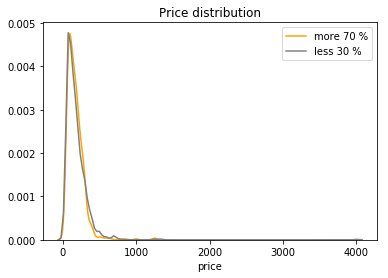

In [39]:
sns.distplot(a=more_df['price'], bins=40, hist=False, color='orange', label='more 70 %');
sns.distplot(a=less_df['price'], bins=40, hist=False, color='gray', label='less 30 %');
plt.title('Price distribution')
plt.savefig('price_dist.jpg')

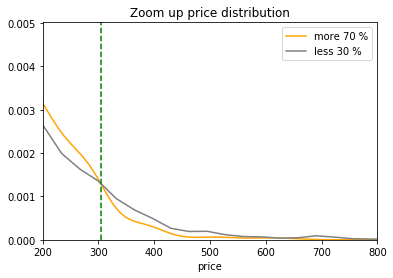

In [40]:
sns.distplot(a=more_df['price'], bins=40, hist=False, color='orange', label='more 70 %');
sns.distplot(a=less_df['price'], bins=40, hist=False, color='gray', label='less 30 %');
plt.xlim(200, 800);
plt.axvline(x=305, color='green', linestyle='--');
plt.title('Zoom up price distribution')
plt.savefig('intersection_price.jpg')

## Summary for price distribution
- `less 30 %` properties tend to price higher. The intersection of 2 KDE is around 300 dollars which means `more 70 %` has more properties under around 300 dollars and `less 30 %` has more properties above 300 dolalrs.

- Therefore, it can be said properties with under 300 dollars are easier booked. 

## 2-2) What makes good review scores by customers?
- check the review scores

In [41]:
review_scores = lis[['id', 'review_scores_accuracy', 'review_scores_rating',
    'review_scores_checkin', 'review_scores_cleanliness',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value']].dropna()

In [42]:
review_scores.head()

,id,review_scores_accuracy,review_scores_rating,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value
1,3075044,10.0,94.0,10.0,9.0,10.0,9.0,9.0
2,6976,10.0,98.0,10.0,9.0,10.0,9.0,10.0
3,1436513,10.0,100.0,10.0,10.0,10.0,10.0,10.0
4,7651065,10.0,99.0,10.0,10.0,10.0,9.0,10.0
5,12386020,10.0,100.0,10.0,10.0,10.0,9.0,10.0


In [43]:
review_scores.describe()

,id,review_scores_accuracy,review_scores_rating,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value
count,2.757000e+03,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000
mean,7.625984e+06,9.431266,91.905332,9.645267,9.258252,9.646717,9.413493,9.168299
std,4.386334e+06,0.932058,9.534299,0.763621,1.169602,0.735257,0.903673,1.009733
min,3.353000e+03,2.000000,20.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,4.075898e+06,9.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,7.693354e+06,10.000000,94.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,1.175738e+07,10.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,1.484378e+07,10.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000


**Weird point**
- Every score's minmum value is 20 % of max. Is this kind of spam? No one didn't rate as 1 or 0 ?

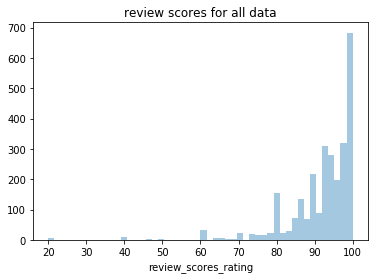

In [44]:
# check the rating as sum
sns.distplot(a = review_scores.review_scores_rating.dropna(),kde=False, bins = 50);
plt.title('review scores for all data')
plt.savefig('all_scores.jpg')

**About distribution of review_scores_rating**
- It looks like there are 5 groups in all. So we need to try separate for each group.

## This is the time to separately analyze data into well booked and opposite

In [45]:
# check well booked (more 70 % booked)
more_review_scores = make_series_df(more_booked_id, 'review_scores_rating', df_return=False)
more_review_scores.head()

0    95.0
1    96.0
2    96.0
3    95.0
4    93.0
dtype: float64

In [46]:
more_review_scores.describe()

count    630.000000
mean      93.142857
std        8.509524
min       20.000000
25%       91.000000
50%       95.000000
75%       99.000000
max      100.000000
dtype: float64

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


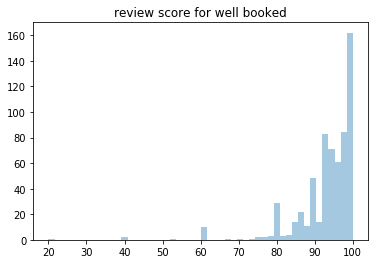

In [47]:
sns.distplot(a = more_review_scores, kde = False, bins = 50);
plt.title('review score for well booked');
plt.savefig('well_booked_scores.jpg');

In [48]:
# check well booked (less 30 % booked)
less_review_scores = make_series_df(less_booked_id, 'review_scores_rating', df_return=False)
less_review_scores.head()

0    100.0
1     91.0
2     91.0
3     73.0
4     66.0
dtype: float64

In [49]:
less_review_scores.describe()

count    1174.000000
mean       91.396082
std         8.664772
min        20.000000
25%        88.000000
50%        93.000000
75%        97.000000
max       100.000000
dtype: float64

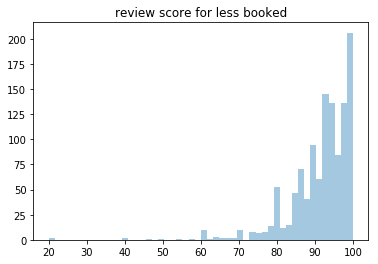

In [50]:
sns.distplot(a = less_review_scores, kde = False, bins = 50);
plt.title('review score for less booked');
plt.savefig('less_booked_scores.jpg');

In [51]:
def ratio_rev_scores(review_scores, thresh=90):
    '''
    return the ratio of scores with some threshold (numeral)
    
    review_scores : Series : Series of review scores
    thresh : numeral : default is 90
    
    '''
    return (review_scores >= thresh).sum() / len(review_scores)

In [52]:
# the ratio of over 90 scores in reviews for less booked 
round(ratio_rev_scores(less_review_scores) * 100)

59.0

In [53]:
# the ratio of over 90 scores in reviews for well booked 
round(ratio_rev_scores(more_review_scores) * 100)

67.0

## Result for review comparing
- Well booked and not well booked properties seems to have similar reviews....
 - A difference is about 2 points in mean
 - Minimum scores are the same
 - Standard deviation's difference is about 0.1 points


- The ratio of scores over 90 is different from well booked and less booked.
 - about 67% of reviews for well booked is over 90
 - about 59% of reviews for less booked is over 90 


- It might suggest that you can't judge how well the properties can be booked by just reviews.

# Summary for all questions
## Question 1 : What changes the price?

- location(city), room_type and accommodates effect the change of prices.


## Question 2 : How can we get more money from AirBnB business?
 - distributions of properties price
 - **2-1) What makes more booked listings? or less booked listings?**
     - Can be said properties with under 300 dollars are easier booked
 - **2-2) What makes good review scores by customers?**
  - Even not well booked had as good scores as well booked. It seems like no link between how much booked and how good the review is. If you believe the review scores, you can say how much booked doesn't effect on the review scores.